# A 1 is coded as being extremely reasonable here!!! - I have since flipped this

For a number of questions there were words that were repeated and you were asked to give these the same score. You did not give the same score for a number of these identical words which suggests you were not focusing on the task and makes your survey results unusable.

### For 3 the indices of the answer_orders are: 0, 6, 11, 15, 17

In [1]:
import pickle
import gzip
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import softmax
import pandas as pd    
import torch

In [2]:
answer_orders1 = pickle.load(open('MTURK_FIRST_' + 'updated_answers_list.pickle','rb'))
answer_orders2 = pickle.load(open('MTURK_QUESTIONS_TWO_' + '_answers_list.pickle','rb'))
answer_orders3 = pickle.load(open('MTURK_QUESTIONS_THREE_' + '_answers_list.pickle','rb'))

In [3]:
mturk1 = pd.read_csv('Tail+Free+Sampling+Survey_October+17%2C+2019_07.33.zip')
mturk2 = pd.read_csv('Tail+Free+Sampling+Survey+2_October+20%2C+2019_19.47.zip')#'Tail+Free+Sampling+Survey_October+16%2C+2019_07.21.zip')
mturk3 = pd.read_csv('Tail+Free+Sampling+Survey+3_October+23%2C+2019_15.11.zip')

In [4]:
print(mturk1.shape, mturk2.shape, mturk3.shape)

(23, 126) (20, 124) (29, 54)


In [5]:
mturk1.head() 

,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,...,Q19_2,Q19_3,Q19_4,Q19_5,Q19_6,Q19_7,Q20,Random ID,Q22 - Parent Topics,Q22 - Topics
0,Start Date,End Date,Response Type,IP Address,Progress,Duration (in seconds),Finished,Recorded Date,Response ID,Recipient Last Name,...,". Just count the stars, right? * He eased __...",". Just count the stars, right? * He eased __...",". Just count the stars, right? * He eased __...",". Just count the stars, right? * He eased __...",". Just count the stars, right? * He eased __...",". Just count the stars, right? * He eased __...",Thank you very much for completing this survey...,Random ID,Q22 - Parent Topics,Q22 - Topics
1,"{""ImportId"":""startDate"",""timeZone"":""America/De...","{""ImportId"":""endDate"",""timeZone"":""America/Denv...","{""ImportId"":""status""}","{""ImportId"":""ipAddress""}","{""ImportId"":""progress""}","{""ImportId"":""duration""}","{""ImportId"":""finished""}","{""ImportId"":""recordedDate"",""timeZone"":""America...","{""ImportId"":""_recordId""}","{""ImportId"":""recipientLastName""}",...,"{""ImportId"":""QID21_2""}","{""ImportId"":""QID21_3""}","{""ImportId"":""QID21_4""}","{""ImportId"":""QID21_5""}","{""ImportId"":""QID21_6""}","{""ImportId"":""QID21_7""}","{""ImportId"":""QID26_TEXT""}","{""ImportId"":""Random ID""}","{""ImportId"":""QID26_TEXT_c25db21136a8433bb1f4d1...","{""ImportId"":""QID26_TEXT_c25db21136a8433bb1f4d1..."
2,2019-10-15 21:35:00,2019-10-15 21:35:13,1,NaN,100,13,1,2019-10-15 21:35:14,R_2X6WbTrQRtVcuAK,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40022,NaN,NaN
3,2019-10-15 22:03:30,2019-10-15 22:08:53,0,107.145.113.42,100,322,1,2019-10-15 22:08:54,R_1KiQLFb92Exgwjx,NaN,...,1,2,5,4,1,1,NaN,99887,NaN,NaN
4,2019-10-15 22:18:07,2019-10-15 22:32:26,0,171.49.170.27,100,858,1,2019-10-15 22:32:26,R_3JjTvGYtgJEC5hD,NaN,...,3,3,2,4,5,2,i like to do this type of work in future,52503,NaN,Unknown


In [6]:
mturk2.head()

,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,...,Q18_7,Q19_1,Q19_2,Q19_3,Q19_4,Q19_5,Q19_6,Q19_7,Q20,Random ID
0,Start Date,End Date,Response Type,IP Address,Progress,Duration (in seconds),Finished,Recorded Date,Response ID,Recipient Last Name,...,"“Ah yes, the obvious question. It would seem t...",The fact of the matter is that _______ - the,The fact of the matter is that _______ - there,The fact of the matter is that _______ - EVA,The fact of the matter is that _______ - people,The fact of the matter is that _______ - it,The fact of the matter is that _______ - this,The fact of the matter is that _______ - in,Thank you very much for completing this survey...,Random ID
1,"{""ImportId"":""startDate"",""timeZone"":""America/De...","{""ImportId"":""endDate"",""timeZone"":""America/Denv...","{""ImportId"":""status""}","{""ImportId"":""ipAddress""}","{""ImportId"":""progress""}","{""ImportId"":""duration""}","{""ImportId"":""finished""}","{""ImportId"":""recordedDate"",""timeZone"":""America...","{""ImportId"":""_recordId""}","{""ImportId"":""recipientLastName""}",...,"{""ImportId"":""QID20_7""}","{""ImportId"":""QID21_1""}","{""ImportId"":""QID21_2""}","{""ImportId"":""QID21_3""}","{""ImportId"":""QID21_4""}","{""ImportId"":""QID21_5""}","{""ImportId"":""QID21_6""}","{""ImportId"":""QID21_7""}","{""ImportId"":""QID26_TEXT""}","{""ImportId"":""Random ID""}"
2,2019-10-17 12:30:23,2019-10-17 12:43:04,0,152.3.43.42,100,761,1,2019-10-17 12:43:05,R_x44zIuJGYqCTeUN,NaN,...,2,1,1,4,3,1,2,1,lots of upper case words - From Trenton,89534
3,2019-10-17 13:06:27,2019-10-17 13:12:05,0,66.91.211.85,100,338,1,2019-10-17 13:12:06,R_511N5bNwxQOSrMB,NaN,...,3,1,2,5,4,2,1,4,No,26967
4,2019-10-17 13:04:10,2019-10-17 13:12:17,0,24.116.21.131,100,487,1,2019-10-17 13:12:18,R_RxbLDvDSxHkb2PT,NaN,...,2,1,1,5,1,1,1,1,no,12285


In [7]:
mturk3.head()

,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,...,Q8_7,Q9_1,Q9_2,Q9_3,Q9_4,Q9_5,Q9_6,Q9_7,Q20,Random ID
0,Start Date,End Date,Response Type,IP Address,Progress,Duration (in seconds),Finished,Recorded Date,Response ID,Recipient Last Name,...,skin stretched out like a drum hair like a _...,It was as if he were strapped in and forced to...,It was as if he were strapped in and forced to...,It was as if he were strapped in and forced to...,It was as if he were strapped in and forced to...,It was as if he were strapped in and forced to...,It was as if he were strapped in and forced to...,It was as if he were strapped in and forced to...,Thank you very much for completing this survey...,Random ID
1,"{""ImportId"":""startDate"",""timeZone"":""America/De...","{""ImportId"":""endDate"",""timeZone"":""America/Denv...","{""ImportId"":""status""}","{""ImportId"":""ipAddress""}","{""ImportId"":""progress""}","{""ImportId"":""duration""}","{""ImportId"":""finished""}","{""ImportId"":""recordedDate"",""timeZone"":""America...","{""ImportId"":""_recordId""}","{""ImportId"":""recipientLastName""}",...,"{""ImportId"":""QID9_7""}","{""ImportId"":""QID10_1""}","{""ImportId"":""QID10_2""}","{""ImportId"":""QID10_3""}","{""ImportId"":""QID10_4""}","{""ImportId"":""QID10_5""}","{""ImportId"":""QID10_6""}","{""ImportId"":""QID10_7""}","{""ImportId"":""QID26_TEXT""}","{""ImportId"":""Random ID""}"
2,2019-10-22 19:19:41,2019-10-22 19:26:37,0,152.3.43.49,100,416,1,2019-10-22 19:26:37,R_2CyocOXH7xlEpk5,NaN,...,5,2,3,1,4,2,1,4,From Trenton,39748
3,2019-10-22 19:33:39,2019-10-22 19:35:18,0,68.8.163.160,100,99,1,2019-10-22 19:35:18,R_1qdCudjW9oRZR45,NaN,...,5,1,5,1,5,1,2,5,no issues,92908
4,2019-10-22 19:38:35,2019-10-22 19:46:26,0,24.45.7.187,100,470,1,2019-10-22 19:46:26,R_1BP0zpTdcJ2vCkX,NaN,...,3,2,1,1,4,2,2,1,no comments,62087


In [8]:
qstart = 'Q5_1'
qend = 'Q19_7'
qstart3 = 'Q5_1'
qend3='Q9_7'

In [9]:
reverse_encoding_dict = {k:v for k, v in zip(np.arange(1,6,1), np.arange(5,0,-1))}
reverse_encoding_dict

{1: 5, 2: 4, 3: 3, 4: 2, 5: 1}

In [10]:
mturk1.drop([0,1,2], axis=0, inplace=True)# dropping the first null response and the header details
mturk2.drop([0,1], axis=0, inplace=True)# dropping the header details
mturk3.drop([0,1], axis=0, inplace=True)

In [11]:
mturk1_len = mturk1.shape[0]

In [12]:
mturk = mturk1.append( mturk2, sort=False)

In [13]:
mturk.reset_index(inplace=True)

In [14]:
mturk3.reset_index(inplace=True)

In [15]:
mturk.loc[:, qstart:qend] = mturk.loc[:, qstart:qend].apply(lambda x: x.astype(int).map(reverse_encoding_dict))
mturk3.loc[:, qstart3:qend3] = mturk3.loc[:, qstart3:qend3].apply(lambda x: x.astype(int).map(reverse_encoding_dict))

In [16]:
mturk.head()

,index,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,...,Q19_2,Q19_3,Q19_4,Q19_5,Q19_6,Q19_7,Q20,Random ID,Q22 - Parent Topics,Q22 - Topics
0,3,2019-10-15 22:03:30,2019-10-15 22:08:53,0,107.145.113.42,100,322,1,2019-10-15 22:08:54,R_1KiQLFb92Exgwjx,...,5,4,1,2,5,5,NaN,99887,NaN,NaN
1,4,2019-10-15 22:18:07,2019-10-15 22:32:26,0,171.49.170.27,100,858,1,2019-10-15 22:32:26,R_3JjTvGYtgJEC5hD,...,3,3,4,2,1,4,i like to do this type of work in future,52503,NaN,Unknown
2,5,2019-10-15 22:48:54,2019-10-15 23:00:41,0,75.142.251.193,100,707,1,2019-10-15 23:00:42,R_2cuydCFibv8JRva,...,5,5,3,5,5,5,Thank you,56916,NaN,Unknown
3,6,2019-10-15 22:51:26,2019-10-15 23:01:15,0,157.46.79.62,100,588,1,2019-10-15 23:01:15,R_3PzZBVyiobpkdjr,...,1,2,4,5,3,3,A22CN9X0JP1HM4,92914,NaN,Unknown
4,7,2019-10-15 22:59:44,2019-10-15 23:19:12,0,49.207.137.2,100,1167,1,2019-10-15 23:19:12,R_2Pcjs6Du7ICHJ0G,...,4,3,2,5,3,1,NICE,64874,NaN,Unknown


In [17]:
mturk.shape

(38, 127)

In [18]:
np.asarray(mturk.columns.tolist())

array(['index', 'StartDate', 'EndDate', 'Status', 'IPAddress', 'Progress',
       'Duration (in seconds)', 'Finished', 'RecordedDate', 'ResponseId',
       'RecipientLastName', 'RecipientFirstName', 'RecipientEmail',
       'ExternalReference', 'LocationLatitude', 'LocationLongitude',
       'DistributionChannel', 'UserLanguage', 'Q5_1', 'Q5_2', 'Q5_3',
       'Q5_4', 'Q5_5', 'Q5_6', 'Q5_7', 'Q6_1', 'Q6_2', 'Q6_3', 'Q6_4',
       'Q6_5', 'Q6_6', 'Q6_7', 'Q7_1', 'Q7_2', 'Q7_3', 'Q7_4', 'Q7_5',
       'Q7_6', 'Q7_7', 'Q8_1', 'Q8_2', 'Q8_3', 'Q8_4', 'Q8_5', 'Q8_6',
       'Q8_7', 'Q9_1', 'Q9_2', 'Q9_3', 'Q9_4', 'Q9_5', 'Q9_6', 'Q9_7',
       'Q10_1', 'Q10_2', 'Q10_3', 'Q10_4', 'Q10_5', 'Q10_6', 'Q10_7',
       'Q11_1', 'Q11_2', 'Q11_3', 'Q11_4', 'Q11_5', 'Q11_6', 'Q11_7',
       'Q12_1', 'Q12_2', 'Q12_3', 'Q12_4', 'Q12_5', 'Q12_6', 'Q12_7',
       'Q13_1', 'Q13_2', 'Q13_3', 'Q13_4', 'Q13_5', 'Q13_6', 'Q13_7',
       'Q14_1', 'Q14_2', 'Q14_3', 'Q14_4', 'Q14_5', 'Q14_6', 'Q14_7',
       'Q1

In [19]:
mturk['Duration (in seconds)']= mturk['Duration (in seconds)'].astype(int)/60
mturk3['Duration (in seconds)']= mturk3['Duration (in seconds)'].astype(int)/60

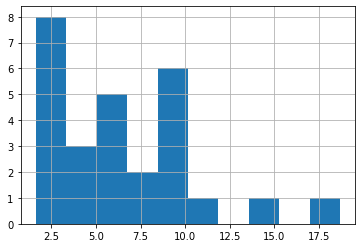

In [20]:
mturk3['Duration (in seconds)'].hist()

In [21]:
qas = mturk.loc[:, qstart:qend]
qas;

In [22]:
qas.head()

,Q5_1,Q5_2,Q5_3,Q5_4,Q5_5,Q5_6,Q5_7,Q6_1,Q6_2,Q6_3,...,Q18_5,Q18_6,Q18_7,Q19_1,Q19_2,Q19_3,Q19_4,Q19_5,Q19_6,Q19_7
0,3,4,1,5,5,5,1,1,3,3,...,3,4,1,1,5,4,1,2,5,5
1,2,4,5,3,2,4,5,5,2,3,...,3,5,1,4,3,3,4,2,1,4
2,3,4,4,5,4,5,3,3,5,5,...,5,5,3,5,5,5,3,5,5,5
3,4,5,2,3,4,1,3,3,1,4,...,3,5,2,3,1,2,4,5,3,3
4,1,5,2,4,3,1,2,4,3,1,...,2,5,2,3,4,3,2,5,3,1


In [23]:
qas.shape

(38, 105)

In [24]:
answer_orders1 = answer_orders1[0:15]
answer_orders2 = answer_orders2[0:15]

In [25]:
answer_orders3 = np.asarray(answer_orders3)[[0, 6, 11, 15, 17]]

In [26]:
qas3 = mturk3.loc[:, qstart3:qend3]

In [27]:
qas3
qas3.head()

,Q5_1,Q5_2,Q5_3,Q5_4,Q5_5,Q5_6,Q5_7,Q6_1,Q6_2,Q6_3,...,Q8_5,Q8_6,Q8_7,Q9_1,Q9_2,Q9_3,Q9_4,Q9_5,Q9_6,Q9_7
0,4,5,5,4,3,1,4,5,5,3,...,1,1,1,4,3,5,2,4,5,2
1,1,5,5,4,1,4,1,4,4,1,...,1,1,1,5,1,5,1,5,4,1
2,5,5,5,5,5,5,4,5,5,5,...,3,4,3,4,5,5,2,4,4,5
3,2,5,5,3,5,5,3,3,4,4,...,3,3,3,5,4,5,1,5,3,5
4,4,4,4,5,5,3,4,3,5,3,...,1,1,1,5,3,5,2,5,3,4


In [28]:
to_df = []

for user_ind in range(qas.shape[0]):
    
    user_ans = qas.loc[user_ind, :]
    
    if user_ind < mturk1_len:
        rel_ans = answer_orders1
        turk_v = 1
    else:
        rel_ans = answer_orders2
        turk_v = 2
    
    for answer_ind, quest in enumerate(rel_ans): 
        
        for q_ind, q in enumerate(quest): 
            abs_ind = answer_ind*len(quest)+q_ind
            #print(abs_ind)
            to_df.append([user_ind, turk_v, answer_ind, q[0].strip(), q[2], q[1], user_ans[abs_ind] ])

# for turk 3 because there are fewer questions

for user_ind in range(qas3.shape[0]):
    
    user_ans = qas3.loc[user_ind, :]
    rel_ans = answer_orders3
    turk_v = 3
    
    for answer_ind, quest in enumerate(rel_ans): 
        
        for q_ind, q in enumerate(quest): 
            abs_ind = answer_ind*len(quest)+q_ind
            #print(abs_ind)
            to_df.append([user_ind+qas.shape[0], turk_v, answer_ind, q[0].strip(), q[2], q[1], user_ans[abs_ind] ])



In [29]:
res = pd.DataFrame(to_df, columns=['user_ind', 'turk_v', 'q_ind', 'word', 'ground_word', 'prob', 'score'])

In [30]:
res['ground_word'] = res['ground_word'].astype(int)

In [31]:
res.head()

,user_ind,turk_v,q_ind,word,ground_word,prob,score
0,0,1,0,event,0,0.00213066,3
1,0,1,0,things,0,0.000778103,4
2,0,1,0,bad,0,0.000491612,1
3,0,1,0,events,1,0.978269,5
4,0,1,0,circumstances,0,0.000509032,5


In [32]:
res.tail()

,user_ind,turk_v,q_ind,word,ground_word,prob,score
4930,64,3,4,hours,0,0.13064274191856384,5
4931,64,3,4,sun,0,0.001812005415558815,2
4932,64,3,4,TV,0,0.01129237748682499,4
4933,64,3,4,thoughts,0,0.001977781532332301,2
4934,64,3,4,other,0,0.02047128789126873,4


In [33]:
from importlib import reload
import utils

reload(utils)
from utils import *

In [34]:
res['score'] = res['score'].astype(int)
res['prob'] = res['prob'].astype(float)

In [35]:
res['score'] = res['score']*2

# Looking at the global results without any cleaning

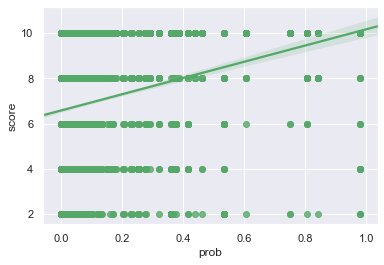

In [36]:
# put a linear regression through this. 

import seaborn as sns; sns.set(color_codes=True)
ax = sns.regplot(x=res['prob'], y=res['score'], color="g")


Text(0, 0.5, 'Score')

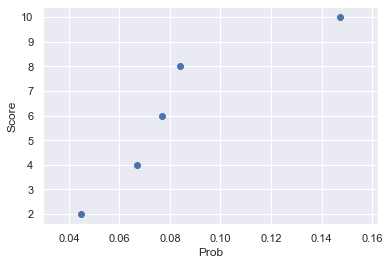

In [37]:
means = res.groupby('score').mean()
plt.scatter(means['prob'], means.index)
plt.xlabel('Prob')
plt.ylabel('Score')

In [38]:
mturk[['LocationLatitude',
 'LocationLongitude', 'Q20', 'Random ID', 'Duration (in seconds)']]

,LocationLatitude,LocationLongitude,Q20,Random ID,Duration (in seconds)
0,28.206207275390625,-80.68740081787109375,NaN,99887,5.366667
1,13.087799072265625,80.27850341796875,i like to do this type of work in future,52503,14.300000
2,39.5272064208984375,-119.91290283203125,Thank you,56916,11.783333
3,13.087799072265625,80.27850341796875,A22CN9X0JP1HM4,92914,9.800000
4,13.087799072265625,80.27850341796875,NICE,64874,19.450000
5,29.691802978515625,-95.6526031494140625,No comments,79189,6.000000
6,37.675201416015625,-120.946502685546875,no,96192,16.800000
7,13.087799072265625,80.27850341796875,A3PWNN3ITRK4X3,75978,7.316667
8,13.087799072265625,80.27850341796875,A3HZEWILX5PQSJ,26893,16.050000
9,13.087799072265625,80.27850341796875,IT IS INFORMATIVE,18522,27.416667


In [39]:
mturk3[['LocationLatitude',
 'LocationLongitude', 'Q20', 'Random ID', 'Duration (in seconds)']]

,LocationLatitude,LocationLongitude,Q20,Random ID,Duration (in seconds)
0,35.996795654296875,-78.89550018310546875,From Trenton,39748,6.933333
1,32.7637939453125,-117.06999969482421875,no issues,92908,1.650000
2,40.8730926513671875,-74.7425994873046875,no comments,62087,7.833333
3,42.297393798828125,-71.07219696044921875,some of the sentences are too vague for easy c...,34368,10.516667
4,35.996795654296875,-78.89550018310546875,MTurper,54273,9.716667
5,51.184600830078125,-0.6172943115234375,This is Joe. I don’t think this counts as conv...,22865,14.433333
6,35.6699066162109375,-97.46469879150390625,NaN,53287,18.683333
7,40.3990020751953125,-86.8574981689453125,NaN,63856,5.816667
8,41.873199462890625,-88.0001983642578125,No.,36083,2.850000
9,35.996795654296875,-78.89550018310546875,skin stretched out like a drum hair like a...,22020,10.100000


In [40]:
mturk.iloc[24]['Q20']

'Slightly confused that the sentences were not complete. I tried to imagine all possibilities for how the sentenced could be written'

# What surveyors should I pay?

## What is the correlation matrix between them? 

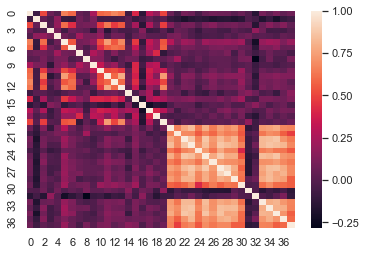

In [41]:
user_vectors = []
for user_ind in res['user_ind'].unique().tolist():
    single_u = res[res['user_ind']==user_ind]['score'].astype(int)
    # normalize to the unit vector
    #print(np.dot(single_u,single_u))
    single_u = single_u/ np.sqrt(np.dot(single_u,single_u))
    #print(np.sqrt(np.dot(single_u,single_u)))
    #print(len(single_u))
    if len(single_u)<100:
        continue
    user_vectors.append(single_u)
user_vectors = np.asarray(user_vectors) # each user is a row

u_corr = np.corrcoef(user_vectors)
u_corr;

sns.heatmap(u_corr)

### same but for the shorter length 3rd quiz

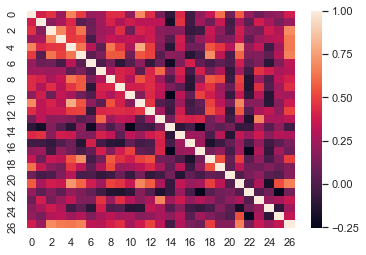

In [42]:
user_vectors = []
for user_ind in res['user_ind'].unique().tolist():
    single_u = res[res['user_ind']==user_ind]['score'].astype(int)
    # normalize to the unit vector
    #print(np.dot(single_u,single_u))
    single_u = single_u/ np.sqrt(np.dot(single_u,single_u))
    #print(np.sqrt(np.dot(single_u,single_u)))
    #print(len(single_u))
    if len(single_u)>100:
        continue
    user_vectors.append(single_u)
user_vectors = np.asarray(user_vectors) # each user is a row

u_corr = np.corrcoef(user_vectors)
u_corr;

sns.heatmap(u_corr)

## Looking at the scores from each one: 

In [43]:
'''for user_ind in res['user_ind'].unique().tolist():
    single_u = res[res['user_ind']==user_ind]
    print('user ind:', user_ind)
    #overall output
    plt.scatter(single_u['prob'], single_u['score'])
    plt.xlabel('Prob')
    plt.ylabel('Score')
    plt.show()
    #mean output
    means = single_u.groupby('score').mean()
    plt.scatter(means['prob'], means.index)
    plt.xlabel('Prob')
    plt.ylabel('Score')
    plt.show()
    #did they get the same words with the same score? 
'''

"for user_ind in res['user_ind'].unique().tolist():\n    single_u = res[res['user_ind']==user_ind]\n    print('user ind:', user_ind)\n    #overall output\n    plt.scatter(single_u['prob'], single_u['score'])\n    plt.xlabel('Prob')\n    plt.ylabel('Score')\n    plt.show()\n    #mean output\n    means = single_u.groupby('score').mean()\n    plt.scatter(means['prob'], means.index)\n    plt.xlabel('Prob')\n    plt.ylabel('Score')\n    plt.show()\n    #did they get the same words with the same score? \n"

In [44]:
perc_const_threshold = 0.9

def dup_in_col(x):
    dupe_mask = x['word'].duplicated(keep=False)
    dupe_words = x['word'][dupe_mask]
    #print(dupe_words)
    for w in dupe_words.unique().tolist():
        same_prob = len(x[x['word']==w]['score'].unique().tolist())==1
        #print(x[x['word']==w]['score'])
        #print('same score', same_prob)
        if same_prob: 
            continue
        else: 
            return False
    return True

bad_users = []

for user_ind in res['user_ind'].unique().tolist():
    single_u = res[res['user_ind']==user_ind]
    same_probs = single_u.groupby('q_ind').apply(dup_in_col )
    int_cons = same_probs.sum() == len(same_probs)
    perc_int_cons = same_probs.sum()/len(same_probs)
    
    print('user ind', user_ind, '| internal consistent?', int_cons, '| percent int con', perc_int_cons)
    
    if perc_int_cons< perc_const_threshold:
        bad_users.append(user_ind)
print('bad users are: ', bad_users)

user ind 0 | internal consistent? False | percent int con 0.8666666666666667
user ind 1 | internal consistent? False | percent int con 0.6
user ind 2 | internal consistent? False | percent int con 0.9333333333333333
user ind 3 | internal consistent? False | percent int con 0.6
user ind 4 | internal consistent? False | percent int con 0.6
user ind 5 | internal consistent? False | percent int con 0.9333333333333333
user ind 6 | internal consistent? False | percent int con 0.9333333333333333
user ind 7 | internal consistent? False | percent int con 0.8666666666666667
user ind 8 | internal consistent? False | percent int con 0.5333333333333333
user ind 9 | internal consistent? False | percent int con 0.6666666666666666
user ind 10 | internal consistent? False | percent int con 0.9333333333333333
user ind 11 | internal consistent? False | percent int con 0.9333333333333333
user ind 12 | internal consistent? False | percent int con 0.9333333333333333
user ind 13 | internal consistent? False 

In [45]:
all_random_ids = mturk['Random ID'].tolist()
all_random_ids += mturk3['Random ID'].tolist()

In [46]:
all_random_ids = np.asarray(all_random_ids)

In [47]:
qas.shape[0] # first one and two turk survey amounts. 

38

In [48]:
bad_users

[0,
 1,
 3,
 4,
 7,
 8,
 9,
 14,
 16,
 17,
 18,
 25,
 31,
 32,
 37,
 44,
 51,
 52,
 54,
 58,
 60,
 62,
 63]

In [49]:
all_random_ids[np.asarray(bad_users)].tolist()

['99887',
 '52503',
 '92914',
 '64874',
 '75978',
 '26893',
 '18522',
 '61245',
 '89261',
 '87713',
 '26630',
 '81290',
 '91882',
 '72080',
 '58467',
 '53287',
 '24000',
 '51730',
 '12621',
 '64162',
 '11276',
 '94073',
 '85386']

### How did they rate the ground truth words? 

In [102]:
'''g_truth = pickle.load(open('prob_slice_replaceable_comparisons_answers_list.pickle','rb'))
all_gwords = []
for q in g_truth: 
    for e in q:
        if e[2]==1:
            all_gwords.append(e[0].strip())'''

"g_truth = pickle.load(open('prob_slice_replaceable_comparisons_answers_list.pickle','rb'))\nall_gwords = []\nfor q in g_truth: \n    for e in q:\n        if e[2]==1:\n            all_gwords.append(e[0].strip())"

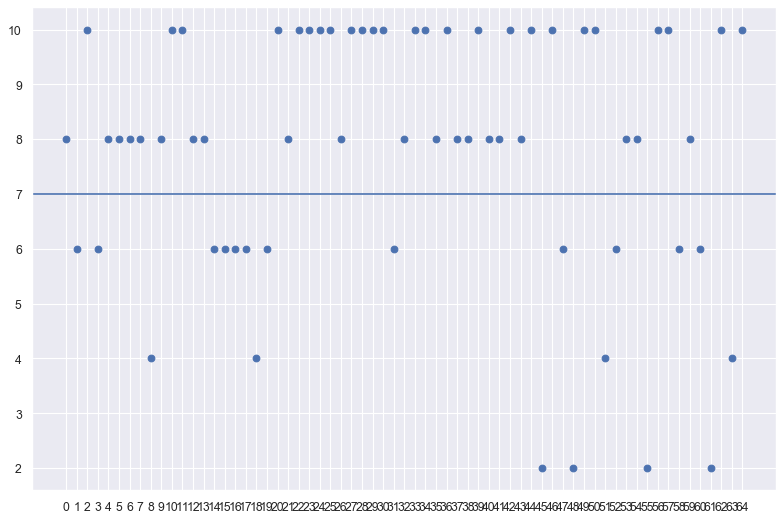

In [50]:
mean_gw_scores = []

threshold = 7

for user_ind in res['user_ind'].unique().tolist():
    single_u = res[res['user_ind']==user_ind]
    gw_mask = single_u['ground_word'].astype(bool)
    #print(single_u)
    #print(gw_mask)
    gw_scores = single_u[gw_mask]['score']
    #print('user ind', user_ind, 'mean g word score', gw_scores.mean(), 'scores for ground words', gw_scores)
    mean_gw_scores.append(gw_scores.median())
    if gw_scores.mean()<threshold:
        
        bad_users.append(user_ind)
plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')


plt.scatter(range(len(mean_gw_scores)), mean_gw_scores)
plt.axhline(threshold)
plt.xticks(np.arange(len(mean_gw_scores)))
plt.show()

In [51]:
all_random_ids[np.asarray(bad_users)].tolist()

['99887',
 '52503',
 '92914',
 '64874',
 '75978',
 '26893',
 '18522',
 '61245',
 '89261',
 '87713',
 '26630',
 '81290',
 '91882',
 '72080',
 '58467',
 '53287',
 '24000',
 '51730',
 '12621',
 '64162',
 '11276',
 '94073',
 '85386',
 '99887',
 '52503',
 '92914',
 '79189',
 '26893',
 '61245',
 '96232',
 '89261',
 '87713',
 '26630',
 '39682',
 '91882',
 '72080',
 '63856',
 '22020',
 '76650',
 '24000',
 '51730',
 '63860',
 '58329',
 '64162',
 '11276',
 '36117',
 '85386']

In [52]:
mturk3.iloc[[3,6,7,8]]

,index,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,...,Q8_7,Q9_1,Q9_2,Q9_3,Q9_4,Q9_5,Q9_6,Q9_7,Q20,Random ID
3,5,2019-10-22 19:39:03,2019-10-22 19:49:34,0,104.156.206.75,100,10.516667,1,2019-10-22 19:49:34,R_AA8wH4Ff78LNiPn,...,3,5,4,5,1,5,3,5,some of the sentences are too vague for easy c...,34368
6,8,2019-10-22 19:37:57,2019-10-22 19:56:38,0,104.200.35.70,100,18.683333,1,2019-10-22 19:56:38,R_vP5yX2YwAa3EvC1,...,1,5,4,2,3,1,4,2,NaN,53287
7,9,2019-10-22 20:06:37,2019-10-22 20:12:27,0,208.38.240.182,100,5.816667,1,2019-10-22 20:12:28,R_3iExpApEyAddl6f,...,1,1,1,5,1,1,1,1,NaN,63856
8,10,2019-10-22 20:13:05,2019-10-22 20:15:57,0,99.141.208.161,100,2.850000,1,2019-10-22 20:15:57,R_27OvoOUPLZ0FV2A,...,2,5,1,5,2,5,4,4,No.,36083


bottom one is ok. 2nd is also bad, not internally consistent. 1st put extr for one of them, didnt understand the poem. 3rd is also bad. 

#### all of the good ones in this case are above 7 as they should be for the ground words. 

In [53]:
mturk.loc[9, 'Random ID']

'18522'

## removing ground words if they already appear in the list to avoid double counting. 

In [54]:
res.head()

,user_ind,turk_v,q_ind,word,ground_word,prob,score
0,0,1,0,event,0,0.002131,6
1,0,1,0,things,0,0.000778,8
2,0,1,0,bad,0,0.000492,2
3,0,1,0,events,1,0.978269,10
4,0,1,0,circumstances,0,0.000509,10


In [55]:
res.tail(10)

,user_ind,turk_v,q_ind,word,ground_word,prob,score
4925,64,3,3,stone,0,0.000612,4
4926,64,3,3,leather,0,0.000571,8
4927,64,3,3,stick,0,0.002636,4
4928,64,3,4,TV,1,0.011284,8
4929,64,3,4,re,0,0.004882,8
4930,64,3,4,hours,0,0.130643,10
4931,64,3,4,sun,0,0.001812,4
4932,64,3,4,TV,0,0.011292,8
4933,64,3,4,thoughts,0,0.001978,4
4934,64,3,4,other,0,0.020471,8


In [56]:
def gword_dupe_ground(x):
    #print(x)
    #print(x.index)
    #rows_to_drop = []
    dupe_mask = x['word'].duplicated(keep=False)
    dupe_x = x[dupe_mask]
    dupe_word_indexes = dupe_x[dupe_x['ground_word'].astype(bool)].index
    #print(dupe_word_indexes)
    #print(dupe_x['word'])
    return dupe_word_indexes
    '''#print(dupe_words)
    for w in dupe_words.unique().tolist(): # going through each of teh dupe words. 
        
        x[x['ground_word']]
        
        same_prob = len(x[x['word']==w]['prob'].unique().tolist())==1
        #print(x[x['word']==w]['score'])
        #print('same score', same_prob)
        if not same_prob: # removing ground truth words with a lower prob
            ind_mask = mask = x['word']==w
            # drop the smaller one
            smaller = np.argmin(x[ind_mask]['prob'])
            rows_to_drop.append( smaller )
            # np.arange(len(x['word']))
        else: # removing the first one to avoid double counting 
            ind_mask = mask = x['word']==w
            # drop the smaller one
            smaller = np.argmin(x[ind_mask].index)
            rows_to_drop.append( smaller )
    return rows_to_drop'''

res_rows_to_drop = res.groupby(['user_ind','q_ind', 'turk_v']).apply(gword_dupe_ground)
res_rows_to_drop



user_ind  q_ind  turk_v
0         0      1            Int64Index([3], dtype='int64')
          1      1            Int64Index([8], dtype='int64')
          2      1           Int64Index([20], dtype='int64')
          3      1           Int64Index([24], dtype='int64')
          4      1             Int64Index([], dtype='int64')
          5      1           Int64Index([40], dtype='int64')
          6      1             Int64Index([], dtype='int64')
          7      1             Int64Index([], dtype='int64')
          8      1           Int64Index([59], dtype='int64')
          9      1             Int64Index([], dtype='int64')
          10     1             Int64Index([], dtype='int64')
          11     1             Int64Index([], dtype='int64')
          12     1             Int64Index([], dtype='int64')
          13     1             Int64Index([], dtype='int64')
          14     1          Int64Index([101], dtype='int64')
1         0      1          Int64Index([108], dtype='int64')


In [57]:
temp_rtod = []
for r in res_rows_to_drop:
    #print(r)
    for i in r: 
        try:
            temp_rtod.append(i)
        except:
            pass
temp_rtod;

In [58]:
res_rows_to_drop = np.asarray(temp_rtod)
res_rows_to_drop

array([   3,    8,   20,   24,   40,   59,  101,  108,  113,  125,  129,
        145,  164,  206,  213,  218,  230,  234,  250,  269,  311,  318,
        323,  335,  339,  355,  374,  416,  423,  428,  440,  444,  460,
        479,  521,  528,  533,  545,  549,  565,  584,  626,  633,  638,
        650,  654,  670,  689,  731,  738,  743,  755,  759,  775,  794,
        836,  843,  848,  860,  864,  880,  899,  941,  948,  953,  965,
        969,  985, 1004, 1046, 1053, 1058, 1070, 1074, 1090, 1109, 1151,
       1158, 1163, 1175, 1179, 1195, 1214, 1256, 1263, 1268, 1280, 1284,
       1300, 1319, 1361, 1368, 1373, 1385, 1389, 1405, 1424, 1466, 1473,
       1478, 1490, 1494, 1510, 1529, 1571, 1578, 1583, 1595, 1599, 1615,
       1634, 1676, 1683, 1688, 1700, 1704, 1720, 1739, 1781, 1788, 1793,
       1805, 1809, 1825, 1844, 1886, 1893, 1898, 1910, 1914, 1930, 1949,
       1991, 1998, 2003, 2015, 2019, 2035, 2054, 2096, 2113, 2114, 2127,
       2132, 2144, 2153, 2159, 2168, 2173, 2179, 22

In [59]:
c_res = res.drop(res_rows_to_drop, axis=0,)

In [60]:
c_res[c_res['ground_word'].astype(bool)].head() # checking that there are some 
# ground words that remain

,user_ind,turk_v,q_ind,word,ground_word,prob,score
31,0,1,4,creek,1,0.000046,4
43,0,1,6,adept,1,0.000358,4
53,0,1,7,shock,1,0.016271,10
64,0,1,9,novel,1,0.000234,4
76,0,1,10,secretaries,1,0.000174,10


In [61]:
c_res.tail()

,user_ind,turk_v,q_ind,word,ground_word,prob,score
4930,64,3,4,hours,0,0.130643,10
4931,64,3,4,sun,0,0.001812,4
4932,64,3,4,TV,0,0.011292,8
4933,64,3,4,thoughts,0,0.001978,4
4934,64,3,4,other,0,0.020471,8


## Prob assigned by model to ground words

In [62]:
res[res['ground_word'].astype(bool)]

,user_ind,turk_v,q_ind,word,ground_word,prob,score
3,0,1,0,events,1,0.978269,10
8,0,1,1,would,1,0.042942,6
20,0,1,2,edge,1,0.279860,10
24,0,1,3,a,1,0.416199,10
31,0,1,4,creek,1,0.000046,4
40,0,1,5,is,1,0.077139,4
43,0,1,6,adept,1,0.000358,4
53,0,1,7,shock,1,0.016271,10
59,0,1,8,the,1,0.360194,10
64,0,1,9,novel,1,0.000234,4


In [63]:
res[res['ground_word'].astype(bool)].drop_duplicates('word')

,user_ind,turk_v,q_ind,word,ground_word,prob,score
3,0,1,0,events,1,0.978269,10
8,0,1,1,would,1,0.042942,6
20,0,1,2,edge,1,0.279860,10
24,0,1,3,a,1,0.416199,10
31,0,1,4,creek,1,0.000046,4
40,0,1,5,is,1,0.077139,4
43,0,1,6,adept,1,0.000358,4
53,0,1,7,shock,1,0.016271,10
59,0,1,8,the,1,0.360194,10
64,0,1,9,novel,1,0.000234,4


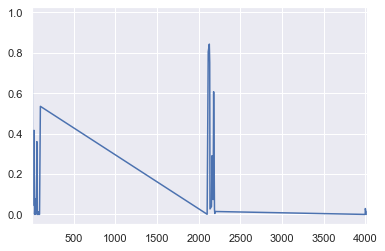

In [64]:
# What is the TF prob assigned to the ground words. 

res[res['ground_word'].astype(bool)].drop_duplicates('word')['prob'].plot() 

Text(0.5, 0, 'score')

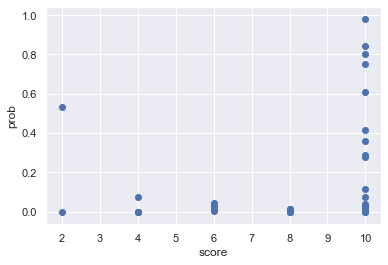

In [65]:
unique_ground = res[res['ground_word'].astype(bool)].drop_duplicates('word')
plt.scatter( unique_ground['score'] ,unique_ground['prob'])
plt.ylabel('prob')
plt.xlabel('score')

### Optional - Getting rid of all the ground words

In [66]:
c_res=c_res[np.invert(c_res['ground_word'].astype(bool))]

In [67]:
c_res.tail()

,user_ind,turk_v,q_ind,word,ground_word,prob,score
4930,64,3,4,hours,0,0.130643,10
4931,64,3,4,sun,0,0.001812,4
4932,64,3,4,TV,0,0.011292,8
4933,64,3,4,thoughts,0,0.001978,4
4934,64,3,4,other,0,0.020471,8


### Setting the good users

In [68]:
good_users = list(set(res['user_ind'].unique().tolist())-set(bad_users))
good_users

[2,
 6,
 10,
 11,
 12,
 13,
 20,
 21,
 22,
 23,
 24,
 26,
 27,
 28,
 29,
 30,
 33,
 34,
 35,
 36,
 38,
 39,
 40,
 41,
 42,
 43,
 46,
 49,
 50,
 56,
 57,
 59,
 64]

In [69]:
len(good_users)

33

In [70]:
len(good_users)

33

# Plots without the bad users

In [71]:
guser_mask = c_res['user_ind'].apply(lambda x: x in good_users)
guser = c_res[guser_mask]

In [72]:
c_res.shape

(4230, 7)

In [73]:
c_res.head()

,user_ind,turk_v,q_ind,word,ground_word,prob,score
0,0,1,0,event,0,0.002131,6
1,0,1,0,things,0,0.000778,8
2,0,1,0,bad,0,0.000492,2
4,0,1,0,circumstances,0,0.000509,10
5,0,1,0,events,0,0.978268,10


In [74]:
c_res.tail()

,user_ind,turk_v,q_ind,word,ground_word,prob,score
4930,64,3,4,hours,0,0.130643,10
4931,64,3,4,sun,0,0.001812,4
4932,64,3,4,TV,0,0.011292,8
4933,64,3,4,thoughts,0,0.001978,4
4934,64,3,4,other,0,0.020471,8


In [75]:
guser.shape

(2190, 7)

In [76]:
guser.head()

,user_ind,turk_v,q_ind,word,ground_word,prob,score
210,2,1,0,event,0,0.002131,6
211,2,1,0,things,0,0.000778,8
212,2,1,0,bad,0,0.000492,8
214,2,1,0,circumstances,0,0.000509,8
215,2,1,0,events,0,0.978268,10


(0, 10.5)

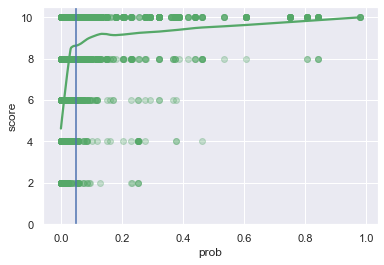

In [77]:
# put a linear regression through this. 



import seaborn as sns; sns.set(color_codes=True)
ax = sns.regplot(x=guser['prob'], y=guser['score'], #robust=True,
                 lowess=True,
                 color="g", scatter_kws={'alpha':0.3})
plt.axvline(0.05)
plt.ylim([0,10.5])

(0, 10.5)

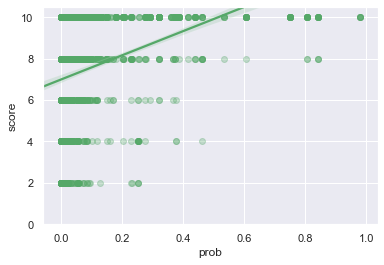

In [78]:
ax = sns.regplot(x=guser['prob'], y=guser['score'], robust=True,
                 color="g", scatter_kws={'alpha':0.3})
plt.ylim([0,10.5])

(0, 10.5)

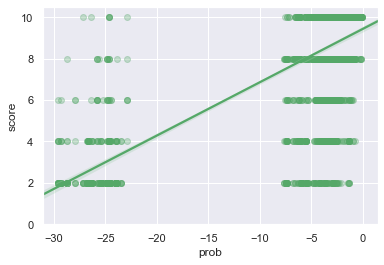

In [79]:
ax = sns.regplot(x=np.log(guser['prob']), y=guser['score'], robust=True,
                 color="g", scatter_kws={'alpha':0.3})
plt.ylim([0,10.5])

In [80]:
na_mask = np.invert(guser['prob'].isna())

In [81]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression(fit_intercept=True)
x = guser['prob'][na_mask]
x = pd.DataFrame(np.log(x))
y = guser['score'][na_mask]
reg.fit( x, y.values )
reg.score(x,y.values )
# goes from 10% to almost 50% with a log term!

0.40553750244136266

In [82]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression(fit_intercept=True)
x = guser['prob']
x2 = x**2
print(x2.shape)
X = pd.DataFrame([x, x2, x**3, x**4]).T
print(X.shape)
reg.fit( X, guser['score'].values )

grid_x = np.arange(0,1, 0.01)
grid_X = pd.DataFrame([grid_x, grid_x**2, grid_x**3, grid_x**4]).T
preds = reg.predict(grid_X)

(2190,)
(2190, 4)


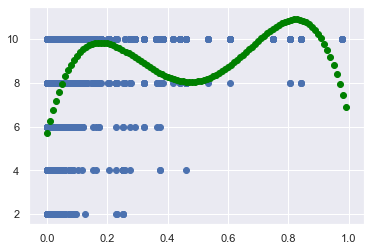

In [83]:
plt.scatter(guser['prob'], guser['score'])
plt.scatter(grid_x, preds, color='green')
#plt.ylim([0,10.5])

In [84]:
guser.groupby('score').apply(lambda x: len(x))

score
2     314
4     194
6     192
8     513
10    977
dtype: int64

# Bootstrapping medians

In [85]:
import bootstrapped.bootstrap as bs
import bootstrapped.stats_functions as bs_stats
def mad(vals):
    boot = bs.bootstrap(vals['prob'].values, stat_func=bs_stats.median)
    return boot.upper_bound - boot.value
    
    '''med = vals['prob'].median()
    k = 1.4826 # assuming normal... 
    madd = np.sum(np.abs(vals['prob'] - med))
    return madd/(madd*k)'''
    
    

medians = guser.groupby('score').median()['prob']
#errors = (1.96*(.std()['prob']/np.sqrt(guser.groupby('score').apply(lambda x:len(x)) )))

errors = guser.groupby('score').apply(mad)
errors

score
2     1.296376e-13
4     2.076320e-03
6     8.073770e-03
8     3.677268e-03
10    5.291123e-03
dtype: float64

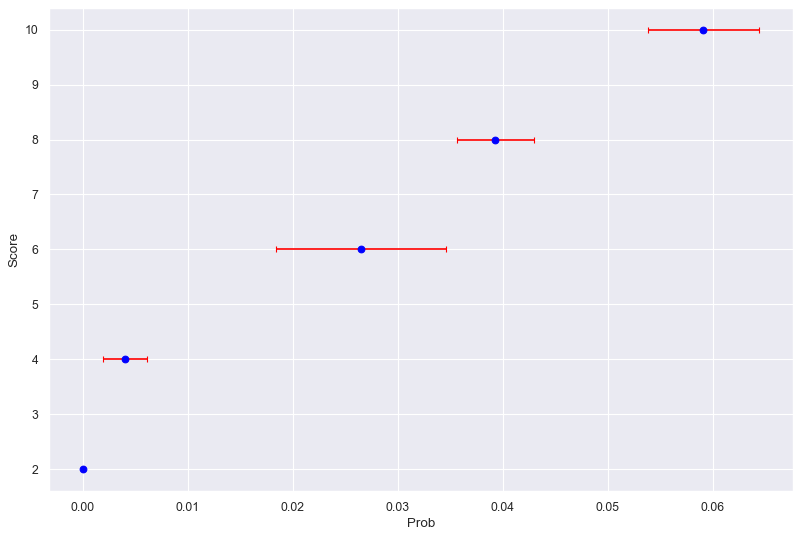

In [86]:
x_pos = medians #np.arange(len(means))
plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')
plt.errorbar(x_pos, means.index, xerr=errors, ecolor='red', fmt='o', capsize=3, color = 'blue')
plt.xlabel('Prob')
plt.ylabel('Score')
plt.show()


## Calculating Means

In [87]:
means = guser.groupby('score').mean()['prob']
errors = (1.96*(guser.groupby('score').std()['prob']/np.sqrt(guser.groupby('score').apply(lambda x:len(x)) )))

errors

score
2     0.003846
4     0.010909
6     0.009509
8     0.010394
10    0.012103
dtype: float64

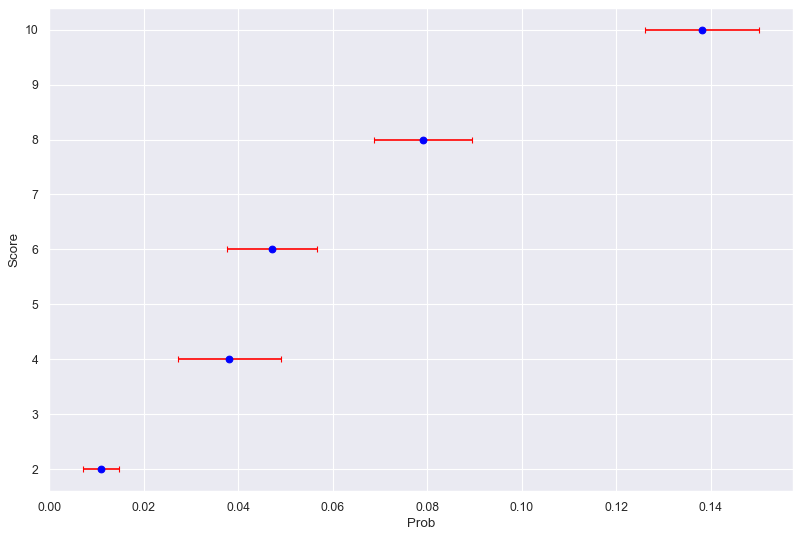

In [88]:
x_pos = means #np.arange(len(means))
plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')
plt.errorbar(x_pos, means.index, xerr=errors, ecolor='red', fmt='o', capsize=3, color = 'blue')
plt.xlabel('Prob')
plt.ylabel('Score')
plt.show()


In [89]:
def mean_boot(vals):
    boot = bs.bootstrap(vals['prob'].values, stat_func=bs_stats.mean)
    return boot.upper_bound - boot.value

means = guser.groupby('score').mean()['prob']
errors = guser.groupby('score').apply(mean_boot)

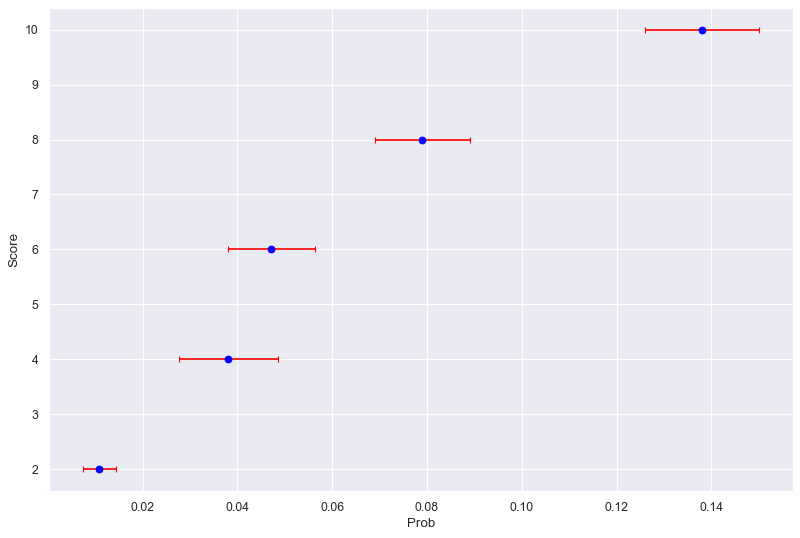

In [90]:
x_pos = means #np.arange(len(means))
plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')
plt.errorbar(x_pos, means.index, xerr=errors, ecolor='red', fmt='o', capsize=3, color = 'blue')
plt.xlabel('Prob')
plt.ylabel('Score')
plt.show()
#plt.scatter(means, means.index)


## Creating a model for predicting the score given probability. Seeing if this is nonlinear

In [91]:
guser.head() # free of ground words that may have overly low probs. 

,user_ind,turk_v,q_ind,word,ground_word,prob,score
210,2,1,0,event,0,0.002131,6
211,2,1,0,things,0,0.000778,8
212,2,1,0,bad,0,0.000492,8
214,2,1,0,circumstances,0,0.000509,8
215,2,1,0,events,0,0.978268,10


In [92]:
guser.tail()

,user_ind,turk_v,q_ind,word,ground_word,prob,score
4930,64,3,4,hours,0,0.130643,10
4931,64,3,4,sun,0,0.001812,4
4932,64,3,4,TV,0,0.011292,8
4933,64,3,4,thoughts,0,0.001978,4
4934,64,3,4,other,0,0.020471,8


In [95]:
guser.shape

(2190, 7)

In [96]:
# pooling the average score across users.

def score_summaries(x):
    sc = x['score']
    x_mean = sc.mean()
    err =1.96*(sc.std()/np.sqrt(len(sc)) )
    return [sc.median(), x['prob'].values[0]]

median_scores = guser.groupby(['q_ind', 'turk_v', 'word']).apply(score_summaries)
median_scores = pd.DataFrame(median_scores)
median_scores.head()

0
q_ind turk_v word                                       
0     1      Population     [3.0, 7.025027803399253e-13]
             bad            [3.0, 0.0004916115431115031]
             circumstances  [8.0, 0.0005090322229079902]
             event          [8.0, 0.0021306623239070177]
             events           [10.0, 0.9782679080963135]

In [97]:
median_scores['median_score'] = median_scores[0].apply(lambda x: x[0])
median_scores['prob'] = median_scores[0].apply(lambda x: x[1])
median_scores.head(10)

0  median_score  \
q_ind turk_v word                                                        
0     1      Population     [3.0, 7.025027803399253e-13]           3.0   
             bad            [3.0, 0.0004916115431115031]           3.0   
             circumstances  [8.0, 0.0005090322229079902]           8.0   
             event          [8.0, 0.0021306623239070177]           8.0   
             events           [10.0, 0.9782679080963135]          10.0   
             things         [8.0, 0.0007781028398312628]           8.0   
      2      Demons           [9.0, 0.09158789366483688]           9.0   
             Devils          [8.0, 0.019027840346097946]           8.0   
             Ghosts          [8.0, 0.023113250732421875]           8.0   
             Witches          [8.0, 0.03481363505125046]           8.0   

                                    prob  
q_ind turk_v word                         
0     1      Population     7.025028e-13  
             bad            4.916115e-04  
             circumstances  5.090322e-04  
             event          2.130662e-03  
             events         9.782679e-01  
             things         7.781028e-04  
      2      Demons         9.158789e-02  
             Devils         1.902784e-02  
             Ghosts         2.311325e-02  
             Witches        3.481364e-02

(0, 10.5)

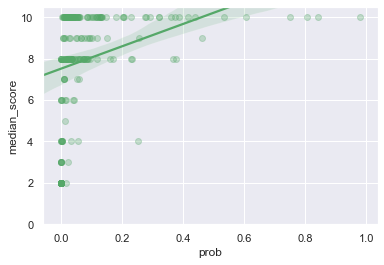

In [98]:
ax = sns.regplot(x=median_scores['prob'], y=median_scores['median_score'], robust=True,
                 color="g", scatter_kws={'alpha':0.3})
plt.ylim([0,10.5])

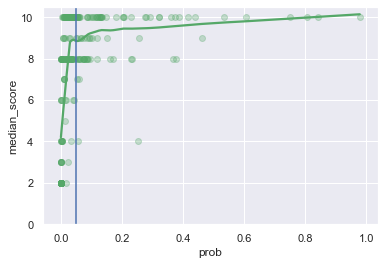

In [99]:
ax = sns.regplot(x=median_scores['prob'], y=median_scores['median_score'], lowess=True,
                 color="g", scatter_kws={'alpha':0.3})
plt.ylim([0,10.5])
plt.axvline(0.05)

In [100]:
x = []
y = []
for q, k in median_scores.groupby(['q_ind', 'turk_v']):
    x.append(k['prob'].values)
    y.append(k['median_score'].values)

In [101]:
# pairing the highest prob word with all the others for each of these: 
x_ml = []
y_ml = []
for q_prob, q_score in zip(x,y): 
    
    max_prob_ind = np.argmax(q_prob)
    max_prob = np.log(q_prob[max_prob_ind])
    
    for j in range(len(q_prob)):
        if j == max_prob_ind:
            continue
        else: 
            #including an interaction term. 
            x_ml.append( [max_prob, np.log(q_prob[j]), max_prob+ np.log(q_prob[j])] )
            y_ml.append( q_score[j] )

In [102]:
len(x_ml)

175

In [103]:
x_ml = pd.DataFrame(x_ml)
y_ml = pd.DataFrame(y_ml)

In [104]:
# hypothesis is that as the max score goes down, the curve is smoother and the curr score goes up. 

In [105]:
# plotting this in 3 dimensions. 
%matplotlib qt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_ml[0], x_ml[1], y_ml)

ax.set_xlabel('Max Prob')
ax.set_ylabel('Curr Prob')
ax.set_zlabel('Curr Score')

plt.show()




(0, 10.5)

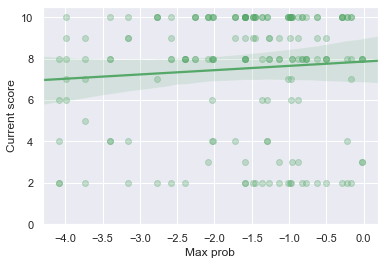

In [106]:
%matplotlib inline
# this is not stat sig
ax = sns.regplot(x=x_ml[0], y=y_ml, robust=True,
                 color="g", scatter_kws={'alpha':0.3})
plt.xlabel('Max prob')
plt.ylabel('Current score')
plt.ylim([0,10.5])


(0, 10.5)

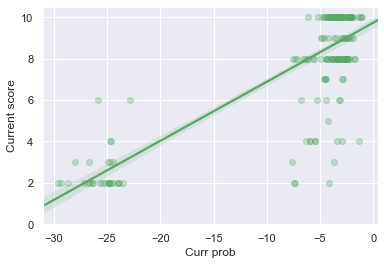

In [107]:
ax = sns.regplot(x=x_ml[1], y=y_ml, robust=True,
                 color="g", scatter_kws={'alpha':0.3})
plt.xlabel('Curr prob')
plt.ylabel('Current score')
plt.ylim([0,10.5])

In [ ]:
y_ml.shape

In [ ]:
x_ml.head()

In [37]:
y_ml.head()

NameError: name 'y_ml' is not defined

In [38]:
# RF overfits and produces worse results than a linear regression. 
# I need to test the linear regression assumptions in order to interpret the coefficients and
# should definitely be using a robust version

# but only a linear regression with log probs performs so well, 
# this does a good job of separating out the data here where there are low probs. that can be treated differently

In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestRegressor

# how to do a robust linear regression? 
reg = LinearRegression(fit_intercept=True) #RandomForestRegressor() #LinearRegression(fit_intercept=True ) # 

splitter= StratifiedKFold(n_splits=3, shuffle=True)
accuracies = []
train_accs = []
feat_imps = dict()

for i in range(10):
    for train_index, test_index in splitter.split(x_ml,y_ml):
        X_train, X_test = x_ml.iloc[train_index], x_ml.iloc[test_index]
        y_train, y_test = y_ml.iloc[train_index].values.ravel(), y_ml.iloc[test_index].values.ravel()
        reg.fit(X_train, y_train) # solver='lbfgs', max_iter=1000
        train_accs.append(reg.score(X_train, y_train))
        accuracies.append(reg.score(X_test, y_test))
        '''for ind, e in enumerate(reg.feature_importances_):
            try:
                feat_imps[ind].append(e)
            except:
                feat_imps[ind] = [e]
        '''

print('train accs', train_accs, sum(train_accs)/len(train_accs))
print('test accs', accuracies, sum(accuracies)/len(accuracies))

NameError: name 'x_ml' is not defined

In [ ]:
for k,v in feat_imps.items():
    print(sum(v)/len(v))

In [ ]:
reg.feature_importances_

In [ ]:
# how accurate with only the info for this value? 

splitter= StratifiedKFold(n_splits=3, shuffle=True)
accuracies = []
train_accs = []

reg = LinearRegression(fit_intercept=True) #LinearRegression(fit_intercept=True)#RandomForestRegressor()#LinearRegression(fit_intercept=True)

for i in range(10):
    for train_index, test_index in splitter.split(x_ml,y_ml):
        X_train, X_test = x_ml.iloc[train_index, 1].values.reshape(-1,1), x_ml.iloc[test_index,1].values.reshape(-1,1)
        #print((X_train))
        y_train, y_test = y_ml.iloc[train_index].values.ravel(), y_ml.iloc[test_index].values.ravel()
        reg.fit(X_train, y_train) # solver='lbfgs', max_iter=1000
        train_accs.append(reg.score(X_train, y_train))
        accuracies.append(reg.score(X_test, y_test))

print('train accs', train_accs, sum(train_accs)/len(train_accs))
print('test accs', accuracies, sum(accuracies)/len(accuracies))

In [ ]:
reg.coef_

### Asking the model to predict the lowest probability of a score of 8. 


In [43]:
median_scores.head()

NameError: name 'median_scores' is not defined

In [44]:
x = []
y = []
meta_deets = []
for q, k in median_scores.groupby(['q_ind', 'turk_v']):
    x.append(k['prob'].values)
    y.append(k['median_score'].values)
    meta_deets.append(q)


NameError: name 'median_scores' is not defined

In [45]:
len(x)

0

In [46]:
x_ml = []
y_ml = []
for q_prob, q_score in zip(x,y): 
    
    if 8 not in q_score:
        continue
        
    q_prob = np.log(q_prob)
    
    eight_inds = np.where(q_score==8)[0]
    
    min_eight_prob = np.min(q_prob[eight_inds])
    '''l_ind = np.where(q_prob == min_eight_prob)[0]
    '''
    
    x_ml.append( q_prob )
    y_ml.append( min_eight_prob )

In [47]:
np.argmin(y[0][np.where(y[0]==6)[0]])


IndexError: list index out of range

In [48]:
len(x_ml)

0

In [49]:
x_ml = pd.DataFrame(x_ml)
y_ml = pd.DataFrame(y_ml)


In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, StratifiedKFold, KFold
from sklearn.ensemble import RandomForestRegressor

# how to do a robust linear regression? 
reg = RandomForestRegressor()#LinearRegression(fit_intercept=True) #RandomForestRegressor() #LinearRegression(fit_intercept=True ) # 

splitter= KFold(n_splits=10, shuffle=True)
accuracies = []
train_accs = []
feat_imps = dict()

for i in range(10):
    for train_index, test_index in splitter.split(x_ml,y_ml):
        X_train, X_test = x_ml.iloc[train_index], x_ml.iloc[test_index]
        y_train, y_test = y_ml.iloc[train_index].values.ravel(), y_ml.iloc[test_index].values.ravel()
        reg.fit(X_train, y_train)
        train_accs.append(reg.score(X_train, y_train))
        accuracies.append(reg.score(X_test, y_test))
        '''for ind, e in enumerate(reg.feature_importances_):
            try:
                feat_imps[ind].append(e)
            except:
                feat_imps[ind] = [e]
        '''

print('train accs', train_accs, sum(train_accs)/len(train_accs))
print('test accs', accuracies, sum(accuracies)/len(accuracies))

ValueError: Cannot have number of splits n_splits=10 greater than the number of samples: n_samples=0.

# Why do I have negative R^2 values?!?!

# Seeing what the distribution of scores is within a single question

In [108]:
guser.tail()

,user_ind,turk_v,q_ind,word,ground_word,prob,score
4930,64,3,4,hours,0,0.130643,10
4931,64,3,4,sun,0,0.001812,4
4932,64,3,4,TV,0,0.011292,8
4933,64,3,4,thoughts,0,0.001978,4
4934,64,3,4,other,0,0.020471,8


In [115]:
# getting all the answers for each of the differnet words

import bootstrapped.bootstrap as bs
import bootstrapped.stats_functions as bs_stats
words_and_probs = dict() #save tuple of index and turk version. 
for k, v in guser.groupby(['q_ind', 'turk_v', 'word']):
    key = ( v['q_ind'].values[0], v['turk_v'].values[0] )
    #print(key)
    #print(v)
    #print(v)
    
    boot = bs.bootstrap(v['score'].values, stat_func=bs_stats.median)
    median_err =  boot.upper_bound - boot.value
    
    v_to_store = (v['score'].median(), median_err, v['score'].values)
    #(v['score'].mean(), (1.96*(v['score'].std()/np.sqrt(len(v['score'])))), v['score'].values)
    
    #(v['score'].median(), median_err, v['score'].values)
    #(v['score'].mean(), (1.96*(v['score'].std()/np.sqrt(len(v['score'])))), v['score'].values)
    
    #
    #print(v['prob'])

    try: 
        words_and_probs[key].append( (v['prob'].values[0], v_to_store, v['word'].values[0]))
    except:
        words_and_probs[key] = [ ( v['prob'].values[0], v_to_store  , v['word'].values[0])]
        #words_and_probs[key].append()
    
    

In [116]:
words_and_probs;

(0, 1)
6
6
6
6
6
6


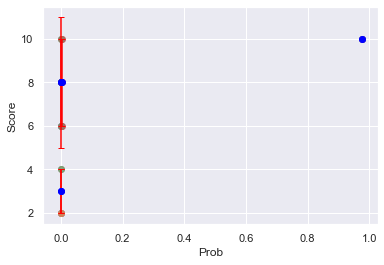

(0, 2)
14
14
14
14
14
14


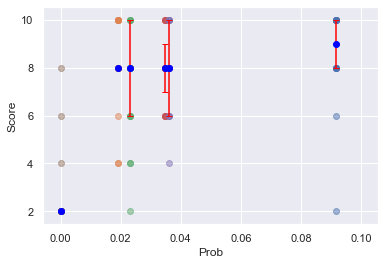

(0, 3)
13
13
13
13
13
13


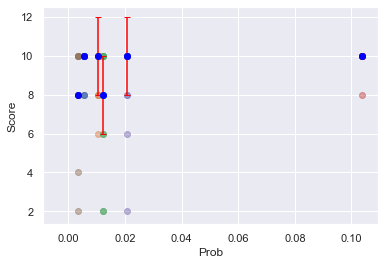

(1, 1)
6
6
6
6
6
6


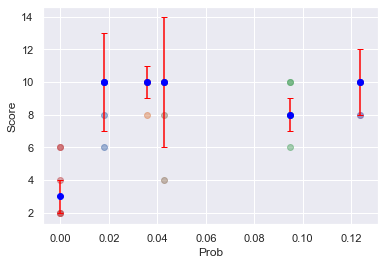

(1, 2)
14
14
14
14
14
14


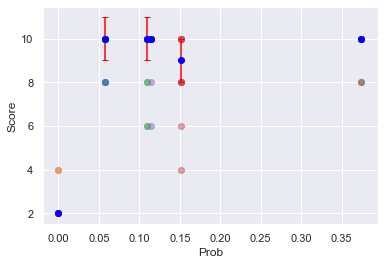

(1, 3)
13
13
13
13
13
13


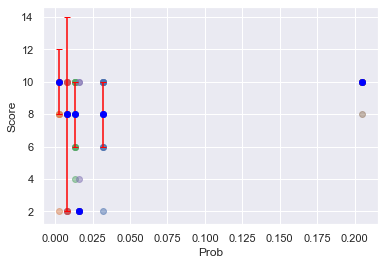

(2, 1)
6
6
6
6
6
6


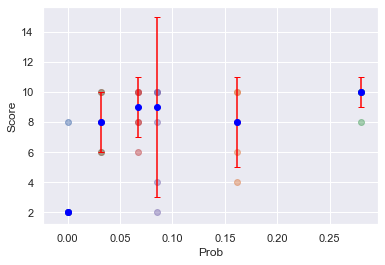

(2, 2)
14
14
14
14
14
14


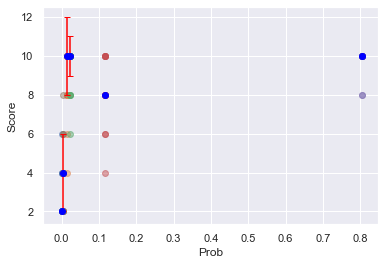

(2, 3)
13
13
13
13
13
13


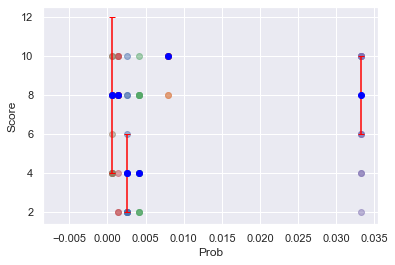

(3, 1)
6
6
6
6
6
6


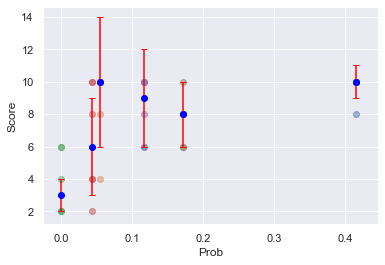

(3, 2)
14
14
14
14
14
14


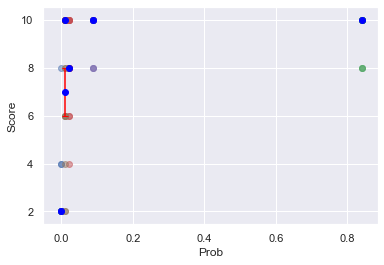

(3, 3)
13
13
13
13
13
13


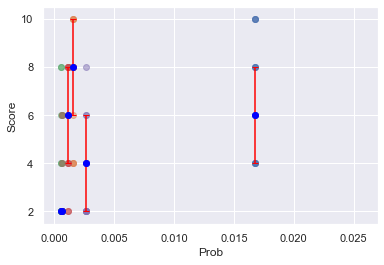

(4, 1)
6
6
6
6
6
6


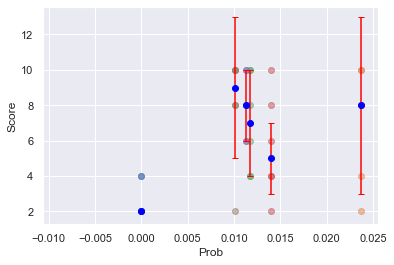

(4, 2)
14
14
14
14
14
14


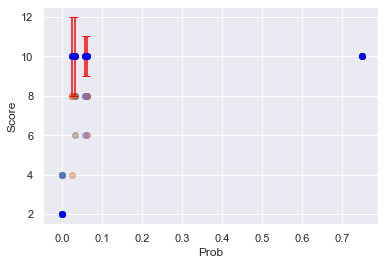

(4, 3)
13
13
13
13
13
13


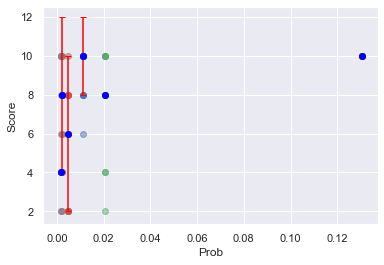

(5, 1)
6
6
6
6
6
6


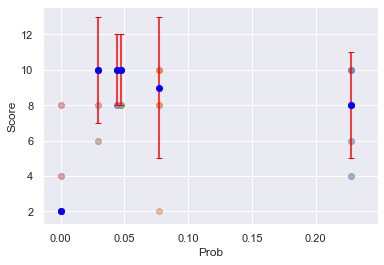

(5, 2)
14
14
14
14
14
14


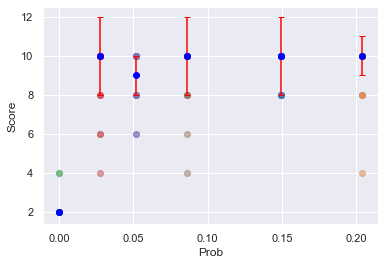

(6, 1)
6
6
6
6
6
6


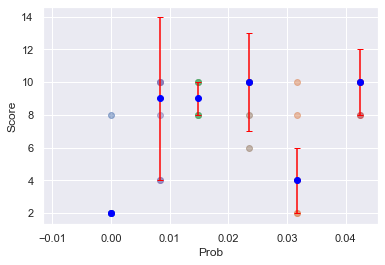

(6, 2)
14
14
14
14
14
14


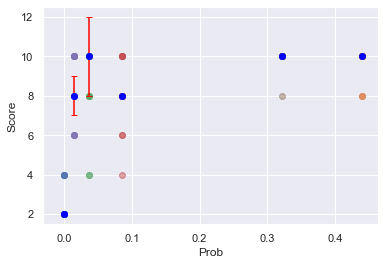

(7, 1)
6
6
6
6
6
6


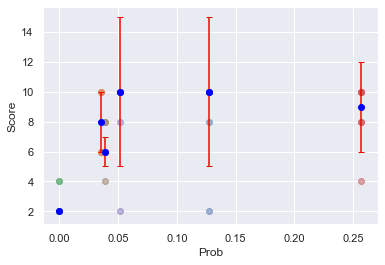

(7, 2)
14
14
14
14
14
14


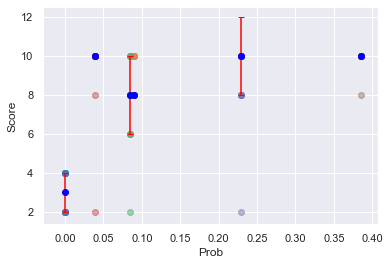

(8, 1)
6
6
6
6
6
6


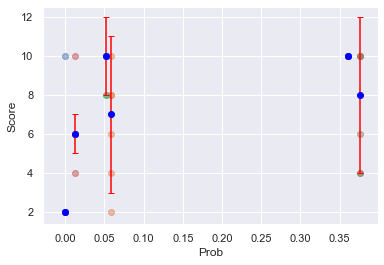

(8, 2)
14
14
14
14
14
14


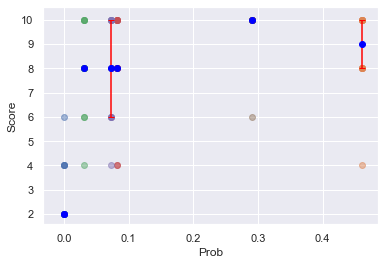

(9, 1)
6
6
6
6
6
6


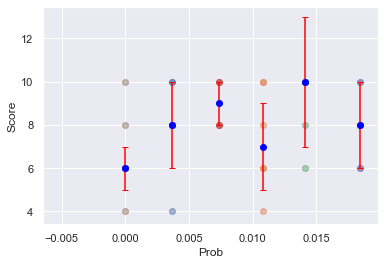

(9, 2)
14
14
14
14
14
14


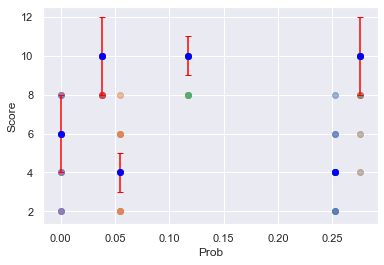

(10, 1)
6
6
6
6
6
6


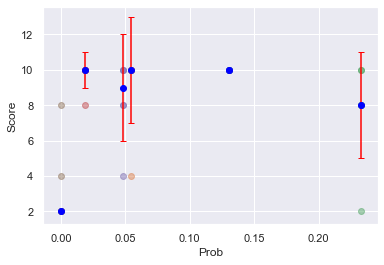

(10, 2)
14
14
14
14
14
14


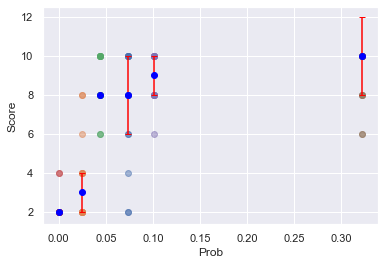

(11, 1)
6
6
6
6
6
6


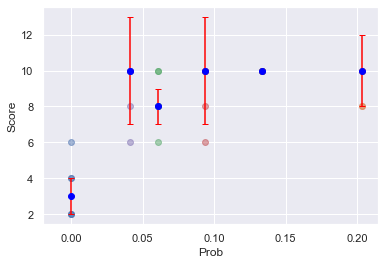

(11, 2)
14
14
14
14
14
14


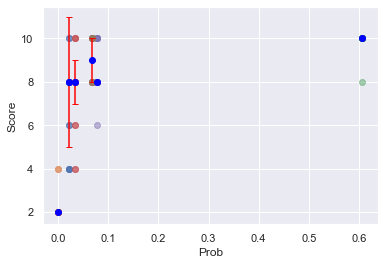

(12, 1)
6
6
6
6
6
6


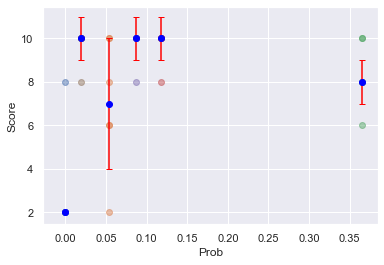

(12, 2)
14
14
14
14
14
14


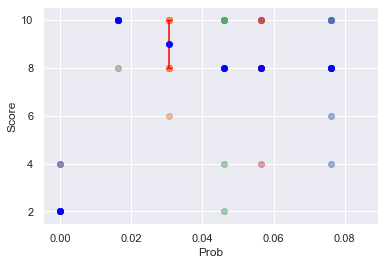

(13, 1)
6
6
6
6
6
6


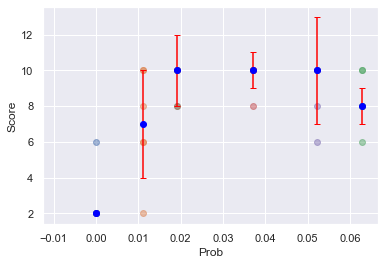

(13, 2)
14
14
14
14
14
14


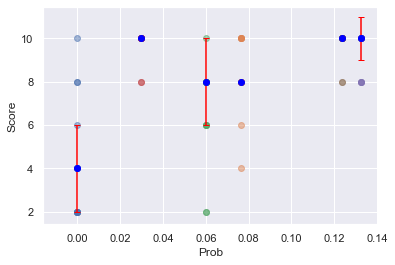

(14, 1)
6
6
6
6
6
6


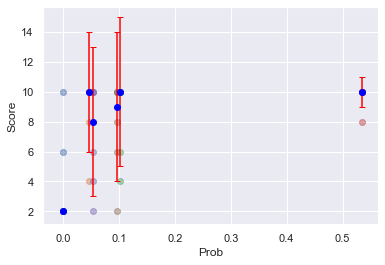

(14, 2)
14
14
14
14
14
14


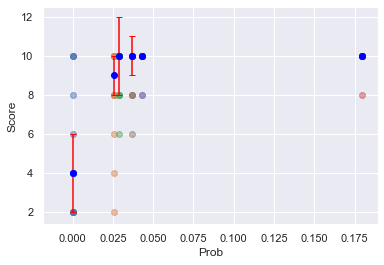

In [117]:
for k, v in words_and_probs.items():
    '''if k[1] != 3:
        continue'''
    print(k)
    for tup in v: 
        print(len(tup[1][2]))
        #plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')
        plt.scatter([tup[0]]*len(tup[1][2]), tup[1][2], alpha=0.5)
        plt.errorbar(tup[0], tup[1][0], yerr=tup[1][1], ecolor='red', fmt='o', capsize=3, color = 'blue')
        plt.xlabel('Prob')
        plt.ylabel('Score')
        #plt.scatter([tup[0]]*1, tup[1][0], alpha=1)
        
    plt.show()

# Seeing what the average score each user gave the highest probability word

# All code needed to plot the median scores and their location in the tail distribution

In [119]:
# pooling the average score across users.

def score_summaries(x):
    sc = x['score']
    x_mean = sc.mean()
    err =1.96*(sc.std()/np.sqrt(len(sc)) )
    return [sc.median(), x['prob'].values[0]]

median_scores = guser.groupby(['q_ind', 'turk_v', 'word']).apply(score_summaries)
median_scores = pd.DataFrame(median_scores)
median_scores.head()

0
q_ind turk_v word                                       
0     1      Population     [3.0, 7.025027803399253e-13]
             bad            [3.0, 0.0004916115431115031]
             circumstances  [8.0, 0.0005090322229079902]
             event          [8.0, 0.0021306623239070177]
             events           [10.0, 0.9782679080963135]

In [120]:
median_scores['median_score'] = median_scores[0].apply(lambda x: x[0])
median_scores['prob'] = median_scores[0].apply(lambda x: x[1])
median_scores.head(10)

0  median_score  \
q_ind turk_v word                                                        
0     1      Population     [3.0, 7.025027803399253e-13]           3.0   
             bad            [3.0, 0.0004916115431115031]           3.0   
             circumstances  [8.0, 0.0005090322229079902]           8.0   
             event          [8.0, 0.0021306623239070177]           8.0   
             events           [10.0, 0.9782679080963135]          10.0   
             things         [8.0, 0.0007781028398312628]           8.0   
      2      Demons           [9.0, 0.09158789366483688]           9.0   
             Devils          [8.0, 0.019027840346097946]           8.0   
             Ghosts          [8.0, 0.023113250732421875]           8.0   
             Witches          [8.0, 0.03481363505125046]           8.0   

                                    prob  
q_ind turk_v word                         
0     1      Population     7.025028e-13  
             bad            4.916115e-04  
             circumstances  5.090322e-04  
             event          2.130662e-03  
             events         9.782679e-01  
             things         7.781028e-04  
      2      Demons         9.158789e-02  
             Devils         1.902784e-02  
             Ghosts         2.311325e-02  
             Witches        3.481364e-02

In [121]:
x = []
y = []
meta_deets = []
for q, k in median_scores.groupby(['q_ind', 'turk_v']):
    x.append(k['prob'].values)
    y.append(k['median_score'].values)
    meta_deets.append(q)

In [122]:
# pairing the highest prob word with all the others for each of these: 
x_ml = []
y_ml = []
for q_prob, q_score in zip(x,y): 
    
    max_prob_ind = np.argmax(q_prob)
    max_prob = np.log(q_prob[max_prob_ind])
    
    for j in range(len(q_prob)):
        if j == max_prob_ind:
            continue
        else: 
            #including an interaction term. 
            x_ml.append( [max_prob, np.log(q_prob[j]), max_prob+ np.log(q_prob[j])] )
            y_ml.append( q_score[j] )

In [123]:
len(x_ml)

175

In [124]:
x_ml = pd.DataFrame(x_ml)
y_ml = pd.DataFrame(y_ml)

(array([24.,  7., 10.,  1.,  0.,  7.,  6., 44., 16., 60.]),
 array([ 2. ,  2.8,  3.6,  4.4,  5.2,  6. ,  6.8,  7.6,  8.4,  9.2, 10. ]),
 <a list of 10 Patch objects>)

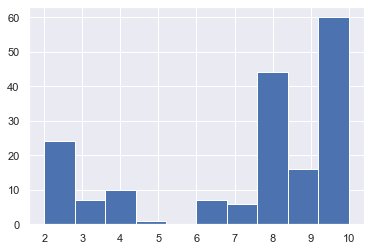

In [125]:
plt.hist(y_ml.values)

In [126]:
# connecting these y points to the underlying distributions. where would nuc and tfs be drawing 
# overlay where the sampled points are and what their actual scores are. 

# what is the underlying pattern behind these score distributions? 

In [127]:
df1 = pd.read_csv('MTURK_FIRST_backup_of_different_prob_slices.csv')
df2 = pd.read_csv('MTURK_QUESTIONS_TWO__backup_of_different_prob_slices.csv')
df3 = pd.read_csv('MTURK_QUESTIONS_THREE__backup_of_different_prob_slices.csv')

In [128]:
meta_deets; # is question index and then turk version. 

In [129]:
df1.head()

,Unnamed: 0,prompt_ind,time_point,batch_ind,ind_in_batch,leading_words,ground_word,ground_word_prob,words,abs_inds,probs
0,0,19,28,0,19,"change something, might be the one trigger th...",events,4.103564e-07,['events' 'event' 'things' 'circumstances' 'ba...,"[0, 1, 2, 3, 4, 50158]","[0.9782679, 0.0021306623, 0.00077810284, 0.000..."
1,1,72,100,3,2,the world ’ s leading pharmaceutical companie...,would,5.513494e-05,['were' 'had' 'would' 'could' 'are' 'iterator'],"[0, 3, 5, 6, 7, 50140]","[0.123787306, 0.09488712, 0.04294153, 0.035621..."
2,2,31,29,1,8,off guard. While your body lay half on the co...,edge,1.622044e-06,['edge' 'counter' 'sink' 'side' 'table' 'Plot'],"[0, 1, 2, 3, 4, 50130]","[0.27985963, 0.1617055, 0.08516163, 0.06683456..."
3,3,56,73,2,10,I'm getting rrREAdy''. My murmur had ended with,a,5.716932e-05,['a' 'the' 'my' 'an' 'me' 'conservancy'],"[0, 1, 2, 3, 4, 50140]","[0.41619945, 0.17138307, 0.11777301, 0.0551321..."
4,4,24,60,1,1,crunched underneath and the ground bubbled wi...,creek,2.153896e-08,['and' 'of' 'oak' 'sand' 'sky' 'Eat'],"[4, 5, 6, 7, 8, 50156]","[0.023683885, 0.013982991, 0.011684752, 0.0113..."


In [130]:
df3.head()

,Unnamed: 0,prompt_ind,time_point,batch_ind,ind_in_batch,leading_words,ground_word,ground_word_prob,words,abs_inds,probs
0,0,85,59,3,15,short glass from the nightstand alongside Jam...,Charles,0.000020,['steadily' 'then' 'poured' 'tried' 'kept' 'he...,"[0, 5, 10, 42, 15, 30]",[0.10372717 0.02085523 0.01228744 0.00357661 0...
1,1,34,47,1,11,"shoes. They were nice shoes, a little dirty, ...",pair,0.179135,['pair' 'item' 'shoe' 'good' 'look' 'fashion'],"[0, 2, 5, 12, 7, 15]",[0.17913476 0.07442557 0.02411442 0.00993254 0...
2,2,40,132,1,17,", smashing a white plastic mask and the face b...",joined,0.006150,['emerged' 'was' 'moved' 'climbed' 'approached...,"[0, 4, 8, 45, 12, 24]",[0.2035434 0.02371438 0.01463069 0.00356245 0...
3,3,24,115,1,1,"never cover it. He considered, took in his pa...",good,0.027579,['man' 'step' 'lifetime' 'call' 'half' 'light'],"[0, 13, 27, 332, 40, 81]",[0.05573973 0.00720579 0.00459934 0.00047751 0...
4,4,83,78,3,13,"race. \n \n ``Time to show off, ''he grinned",and,0.140701,['as' 'at' 'in' 'to' 'from' 'a'],"[0, 2, 4, 3, 6, 12]",[0.4007027 0.14070147 0.03973731 0.11272091 0...


In [131]:
df3 = df3.iloc[[0, 6, 11, 15, 17]]
df3.shape

(5, 11)

In [132]:
df3.reset_index(inplace=True)

In [133]:
batch_size=25
num_batches=4
prompt_length=100
generated_length=150
tot_len = prompt_length+generated_length

import encoder
from decodeLogits import *
model_name='774M' #345M
models_dir='../gpt-2/models'
enc = encoder.get_encoder(model_name, models_dir)

prompts=pd.read_csv('test_dataframe_500primer.csv')

In [134]:
gpt_out_path = 'gpt-2_output/'
additional_path = '-model_774M-seed_27'#'' 
#all_perps = pickle.load( gzip.open(gpt_out_path+'all_perplexities_perplexity_scores_for_the_dataset_Human_StoryPrompts_Completion.csv'+additional_path+'.pickle.gz', 'rb'))
all_logits = pickle.load( gzip.open(gpt_out_path+'all_logits_perplexity_scores_for_the_dataset_Human_StoryPrompts_Completion.csv'+additional_path+'.pickle.gz', 'rb')) # needed to get the probabilities
text = pickle.load( gzip.open(gpt_out_path+'all_text_perplexity_scores_for_the_dataset_Human_StoryPrompts_Completion.csv'+additional_path+'.pickle.gz', 'rb'))

In [135]:
y_ml.iloc[0].values

array([3.])

In [136]:
len(meta_deets)

35

In [137]:
meta_deets

[(0, 1),
 (0, 2),
 (0, 3),
 (1, 1),
 (1, 2),
 (1, 3),
 (2, 1),
 (2, 2),
 (2, 3),
 (3, 1),
 (3, 2),
 (3, 3),
 (4, 1),
 (4, 2),
 (4, 3),
 (5, 1),
 (5, 2),
 (6, 1),
 (6, 2),
 (7, 1),
 (7, 2),
 (8, 1),
 (8, 2),
 (9, 1),
 (9, 2),
 (10, 1),
 (10, 2),
 (11, 1),
 (11, 2),
 (12, 1),
 (12, 2),
 (13, 1),
 (13, 2),
 (14, 1),
 (14, 2)]

In [184]:
t = -np.sort(-q_score)
print(q_score)
i = np.argsort(-q_score)
print(t[i])
i

[10. 10. 10.  9.  8.  2.]
[10. 10. 10.  9.  8.  2.]


array([0, 1, 2, 3, 4, 5])

In [167]:
q_score[0]

2.0

(0, 1)


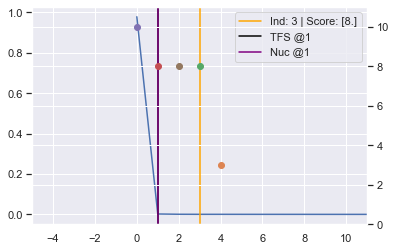

(0, 2)
(0, 3)
(1, 1)
(1, 3)


/Users/trentonbricken/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:52: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
/Users/trentonbricken/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:56: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/Users/trentonbricken/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:57: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


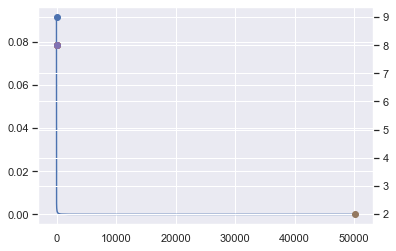

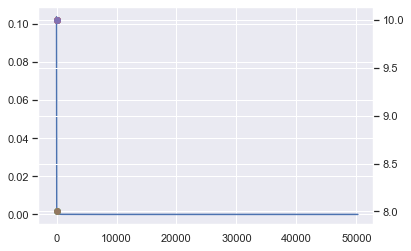

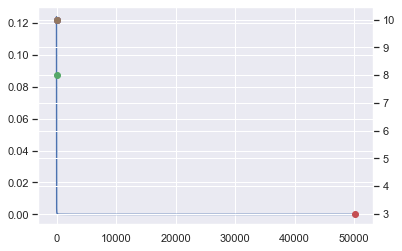

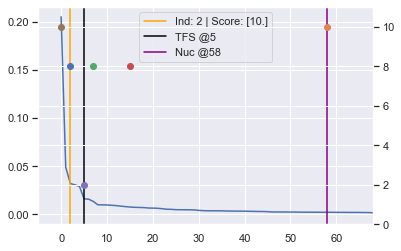

(2, 1)
(2, 2)


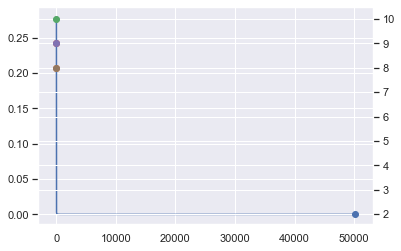

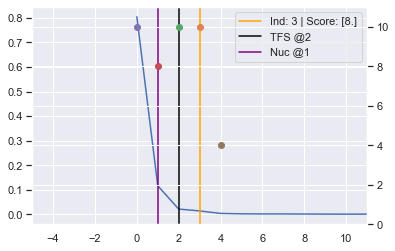

(2, 3)


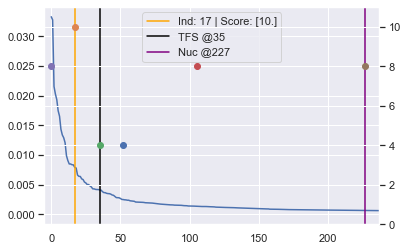

(3, 1)


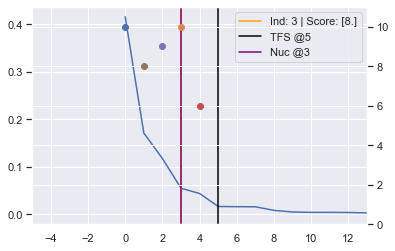

(3, 2)


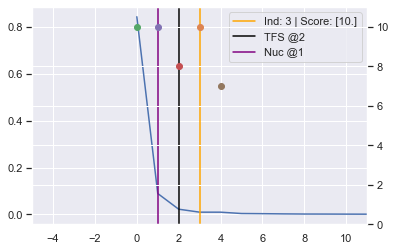

(3, 3)


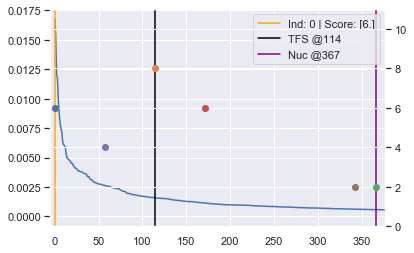

(4, 1)


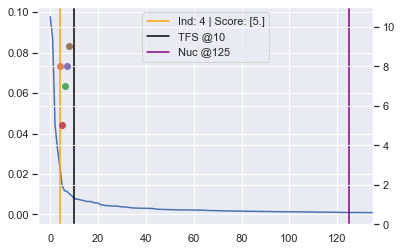

(4, 3)


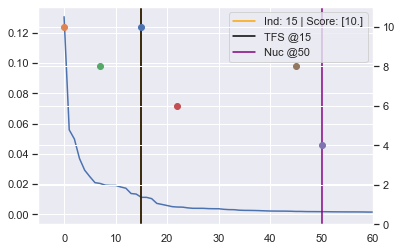

(5, 1)
(6, 2)
(7, 1)


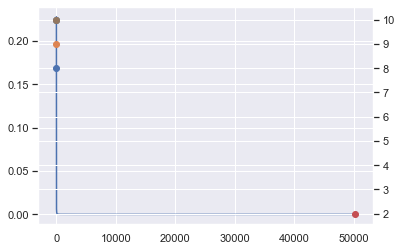

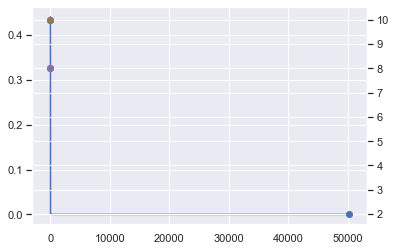

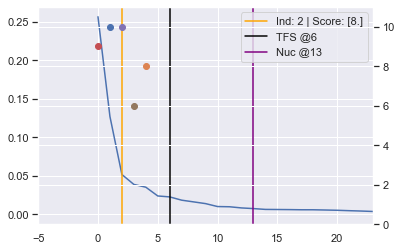

(7, 2)
(8, 1)


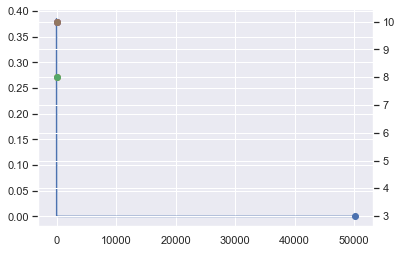

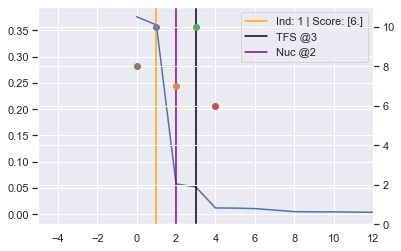

(8, 2)
(9, 1)


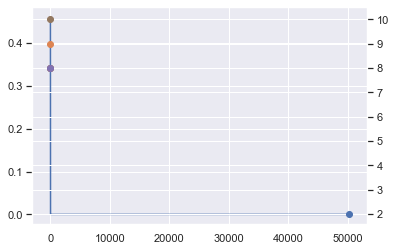

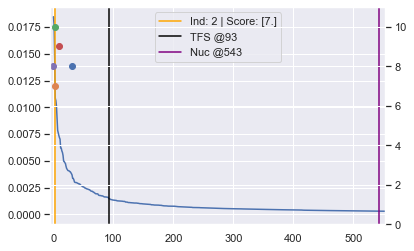

(10, 1)
(10, 2)


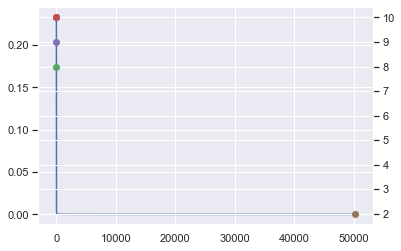

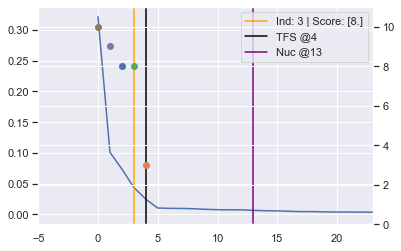

(11, 1)
(11, 2)
(12, 1)


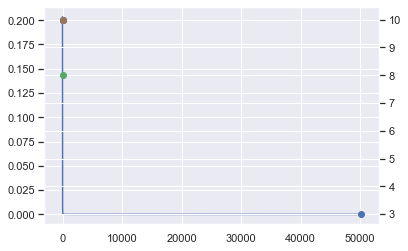

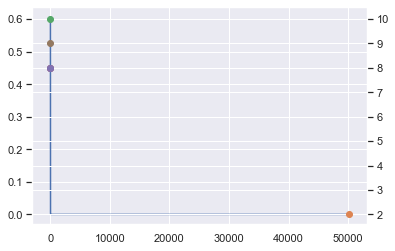

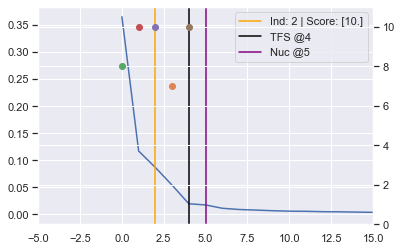

(12, 2)
(13, 1)


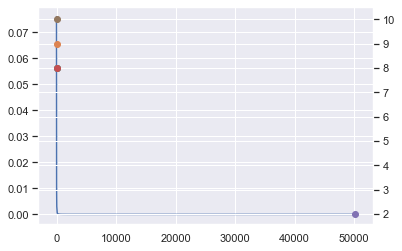

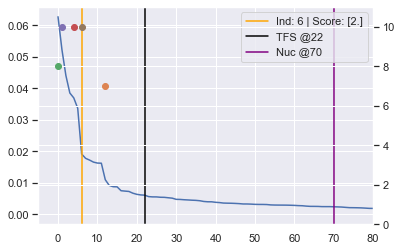

(13, 2)
(14, 1)


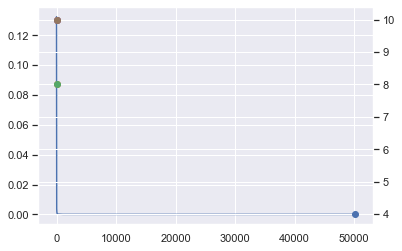

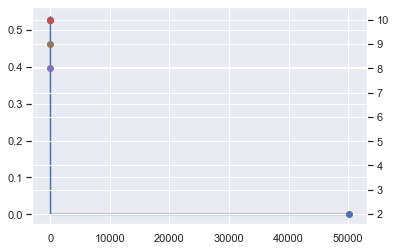

In [197]:
to_df = []
for m_deets_ind, q_turk in enumerate(meta_deets):
    
    if 8 not in y[m_deets_ind]:
        continue
        
    '''if q_turk[1] !=3:
        continue'''
    print(q_turk)
    
    q_score = y[m_deets_ind]
    q_prob = x[m_deets_ind]
    
    #temp_ans = []
    ind = q_turk[0]
    if q_turk[1] == 1:
        sps_loc = df1.loc[ind, ['batch_ind', 'ind_in_batch', 'time_point'] ]
    elif q_turk[1] == 2:
        sps_loc = df2.loc[ind, ['batch_ind', 'ind_in_batch', 'time_point'] ]
    elif q_turk[1] == 3:
        sps_loc = df3.loc[ind, ['batch_ind', 'ind_in_batch', 'time_point'] ]
        
    b_ind, ind_in_b,tp = sps_loc['batch_ind'], sps_loc['ind_in_batch'],sps_loc['time_point']
    text_tp = tp + prompt_length+1
    sps = softmax(-np.sort(-all_logits[b_ind][ind_in_b, tp, :]))
    indices = np.argsort(-all_logits[b_ind][ind_in_b, tp, :])
    
    ground_token = text[b_ind][ind_in_b][text_tp]
    
    fig, ax = plt.subplots()
    secaxy = ax.twinx()
    
    ax.plot(np.arange(len(sps)), sps)
    
    for prob, score in zip(q_prob, q_score):
        sps_ind = np.where(sps==prob)[0]
        secaxy.scatter(sps_ind, score)

    # find the first thing to drop below the threshold of 8. 
    # need to sort them first. 
    prob_s = -np.sort(-q_prob)
    prob_inds = np.argsort(-q_prob)
    q_score = q_score[prob_inds]
    eight_inds = np.where(q_score<8)[0]
    
    if len(eight_inds)>1:
        eight_inds = eight_inds[0]
        
    if q_turk[1] !=3 and eight_inds == (len(prob_s)-1): # it has found the last one and this one is too far away for it to count 
        continue
         
    if eight_inds >0:
        eight_inds -=1
    #print('index found after looking at the max:', eight_inds)
    min_eight_prob = prob_s[eight_inds]
    min_eight_score = q_score[np.where(q_prob==min_eight_prob)[0]]
    sps_ind = np.where(sps==min_eight_prob)[0]
    if len(sps_ind)>0:
        sps_ind = sps_ind[0]
    else: 
        continue

    ax.axvline(sps_ind, color='orange', label='Ind: '+str(sps_ind)+' | Score: '+str(min_eight_score))
    
    # plot where TFS and Nuc would go. Overall this looks v promising!
    
    first = sps[1:] - sps[:-1]
    second = first[1:] - first[:-1]
    tail_id = new_tfs(second, 0.9)
    ax.axvline(tail_id, color='black', label='TFS @' + str(tail_id))
    
    tail_id_nuc = nucleus_calc(sps, 0.63)
    ax.axvline(tail_id_nuc, color='purple', label='Nuc @' +str(tail_id_nuc))
    ax.set_xlim([-5,tail_id_nuc+10])
    secaxy.set_ylim([0,11])
    ax.legend()
        
    plt.show()
    
    # see how far away the tfs and nuc inds are: 
    to_df.append([sps_ind, tail_id, tail_id_nuc])

In [200]:
dist = pd.DataFrame(to_df, columns = ['first_8_drop', 'tfs', 'nuc'] )
dist.head()

,first_8_drop,tfs,nuc
0,3,1,1
1,2,5,58
2,3,2,1
3,17,35,227
4,3,5,3


In [201]:
dist['l1_tfs'] = np.abs(dist['tfs'] - dist['first_8_drop'])
dist['l1_nuc'] = np.abs(dist['nuc'] - dist['first_8_drop'])

In [202]:
dist[['l1_tfs', 'l1_nuc']].mean()

l1_tfs    17.533333
l1_nuc    95.000000
dtype: float64

In [203]:
dist[['l1_tfs', 'l1_nuc']].median()

l1_tfs     2.0
l1_nuc    11.0
dtype: float64

In [ ]:
#TFS looks closer and doesn't have to be tuned to this. 

# Want to plot how each of the different scores given correspond to the probabilities. 

# Fixing word probs for the last batch: 

# isnt actually needed because almost all of the highest prob words are real words. 

In [118]:
answer_orders3

array([[['tried', 0.10372717, 0],
        ['held', 0.02085523, 0],
        ['steadily', 0.012287442, 0],
        ['kept', 0.00357661, 0],
        ['then', 0.010425571, 0],
        ['poured', None, 0],
        [' Charles', '2.0199675418552943e-05', '1']],

       [['in', 0.2050555, 0],
        [' always', '0.029037535190582275', '1'],
        ['and', None, 0],
        ['life', 0.016160188, 0],
        ['were', 0.0022300952, 0],
        ['was', 0.013501197, 0],
        ['did', 0.0076630623, 0]],

       [['battle', 0.03326915, 0],
        ['meal', 0.007902123, 0],
        ['mess', 0.004121192, 0],
        ['table', 0.0006613423, 0],
        ['video', 0.002502989, 0],
        [' whole', '0.0054514845833182335', '1'],
        ['private', 0.0013805928, 0]],

       [['pearl', 0.016783189, 0],
        ['hedge', None, 0],
        [' nest', '0.00024162190675269812', '1'],
        ['flower', 0.0015681898, 0],
        ['stone', 0.0005706684, 0],
        ['leather', 0.0011454553, 0],
        ['st

In [119]:
from importlib import reload
import utils

reload(utils)
from utils import *

In [120]:
model_name='774M' #345M
models_dir='../gpt-2/models'
enc = encoder.get_encoder(model_name, models_dir)

In [121]:
enc.encode('hey')

[20342]

In [122]:
df3.head()

,index,Unnamed: 0,prompt_ind,time_point,batch_ind,ind_in_batch,leading_words,ground_word,ground_word_prob,words,abs_inds,probs
0,0,0,85,59,3,15,short glass from the nightstand alongside Jam...,Charles,0.000020,['steadily' 'then' 'poured' 'tried' 'kept' 'he...,"[0, 5, 10, 42, 15, 30]",[0.10372717 0.02085523 0.01228744 0.00357661 0...
1,6,6,23,132,1,0,like to feel her warmth in person. \n \n His ...,always,0.029038,['were' 'and' 'was' 'did' 'in' 'life'],"[0, 2, 5, 58, 7, 15]",[0.2050555 0.03209 0.01616019 0.0022301 0...
2,11,11,26,85,1,3,at the buffet delivered to the table I was si...,whole,0.005451,['table' 'meal' 'mess' 'video' 'battle' 'priva...,"[0, 17, 35, 227, 52, 105]",[0.03326915 0.00790212 0.00412119 0.00066134 0...
3,15,15,84,65,3,14,\n pal skin stretched \n out like a drum \n ha...,nest,0.000242,['flower' 'stick' 'hedge' 'leather' 'pearl' 's...,"[0, 57, 114, 367, 171, 342]",[0.01678319 0.00263605 0.00156819 0.00057067 0...
4,17,17,6,52,0,6,. It was as if he were strapped in and forced ...,TV,0.011284,['hours' 'other' 'TV' 'sun' 're' 'thoughts'],"[0, 7, 15, 50, 22, 45]",[0.13064274 0.02047129 0.01129238 0.00181201 0...


In [9]:
n_ans_ords = []
for m_deets_ind, q_turk in enumerate(meta_deets):
    
    if 8 not in y[m_deets_ind]:
        continue
        
    if q_turk[1] !=3:
        continue
    print(q_turk)
    
    q_score = y[m_deets_ind]
    q_prob = x[m_deets_ind]
    
    #temp_ans = []
    ind = q_turk[0]
    if q_turk[1] == 1:
        sps_loc = df1.loc[ind, ['batch_ind', 'ind_in_batch', 'time_point'] ]
    elif q_turk[1] == 2:
        sps_loc = df2.loc[ind, ['batch_ind', 'ind_in_batch', 'time_point'] ]
    elif q_turk[1] == 3:
        sps_loc = df3.loc[ind, ['batch_ind', 'ind_in_batch', 'time_point'] ]
        abs_word_inds = df3.loc[ind, 'abs_inds' ]
        # why is this a string?!?!?!
        temp_ = []
        for l in abs_word_inds[1:-1].split(' '):
            if l[-1]==',':
                ugh = int(l[:-1])
            else:
                ugh = int(l)
            temp_.append(ugh)
        abs_word_inds = temp_
        
    print('abs word inds', abs_word_inds)
        
    b_ind, ind_in_b,tp = sps_loc['batch_ind'], sps_loc['ind_in_batch'],sps_loc['time_point']
    text_tp = tp + prompt_length+1
    sps = softmax(-np.sort(-all_logits[b_ind][ind_in_b, tp, :]))
    sps_no_sort = softmax(all_logits[b_ind][ind_in_b, tp, :])
    indices = np.argsort(-all_logits[b_ind][ind_in_b, tp, :])
    
    ground_token = text[b_ind][ind_in_b][text_tp]
    
    # need to convert the abs prob back for all of part 3. 
    real_word_tokens, abs_pos = remove_non_words(indices)
    real_word_probs = sps[np.asarray(abs_pos)]
    
    # converting the absolute positions to the relative ones that I want. 
    abs_to_rel_index = {absolute:rel for rel, absolute in zip(range(len(abs_pos)), abs_pos )}
    ugh_word_probs = []
    for abss in abs_word_inds:
        try:
            ugh_word_probs.append(real_word_probs[abs_to_rel_index[abss]])
        except:
            ugh_word_probs.append(None)
            
    print(ugh_word_probs)
   
    #sel_word_probs = real_word_probs[np.asarray(rel_words_positions_wanted)]
    #print(sel_word_probs)
    temp_ans = []
    counter=0
    print(answer_orders3[q_turk[0]])
    for lol, el in enumerate(answer_orders3[q_turk[0]]):
        if el[2] == '1':
            temp_ans.append((el[0], el[1], el[2]))
        else:  
            w = real_word_tokens[abs_word_inds[counter]]  #el[0]
            w_real_ind = enc.encode(w)

            #w = real_word_tokens[int(i)]
            print(counter)
            real_prob = ugh_word_probs[counter]#sps_no_sort[w_real_ind]
            temp_ans.append((w,real_prob,0))
            counter +=1
        
        #print('from the encoding:', real_prob)
    n_ans_ords.append(temp_ans)
    
    #for i in abs_word_inds:
    #    print(real_word_tokens[int(i)])
    
    
        

NameError: name 'meta_deets' is not defined

In [ ]:
# this was the original.
['tried', '0.003576610004529357', '0'],
        ['held', '0.005421289708465338', '0'],
        ['steadily', '0.10372716933488846', '0'],
        ['kept', '0.010425571352243423', '0'],
        ['then', '0.02085522934794426', '0'],
        ['poured', '0.0122874416410923', '0'],
        [' Charles', '2.0199675418552943e-05', '1']],

In [8]:
n_ans_ords

NameError: name 'n_ans_ords' is not defined

In [168]:
answer_orders3

array([[['tried', '0.003576610004529357', '0'],
        ['held', '0.005421289708465338', '0'],
        ['steadily', '0.10372716933488846', '0'],
        ['kept', '0.010425571352243423', '0'],
        ['then', '0.02085522934794426', '0'],
        ['poured', '0.0122874416410923', '0'],
        [' Charles', '2.0199675418552943e-05', '1']],

       [['in', '0.013501197099685669', '0'],
        [' always', '0.029037535190582275', '1'],
        ['and', '0.032089997082948685', '0'],
        ['life', '0.007663062307983637', '0'],
        ['were', '0.20505550503730774', '0'],
        ['was', '0.016160188242793083', '0'],
        ['did', '0.002230095211416483', '0']],

       [['battle', '0.002502989023923874', '0'],
        ['meal', '0.007902123034000397', '0'],
        ['mess', '0.0041211917996406555', '0'],
        ['table', '0.03326914831995964', '0'],
        ['video', '0.0006613422883674502', '0'],
        [' whole', '0.0054514845833182335', '1'],
        ['private', '0.001380592817440629'

In [3]:
answer_orders3_t = pickle.load(open('MTURK_QUESTIONS_THREE_' + '_answers_list.pickle','rb'))

In [6]:
answer_orders3_t = np.asarray(answer_orders3_t)[[0, 6, 11, 15, 17]]

In [7]:
answer_orders3_t

array([[['tried', '0.003576610004529357', '0'],
        ['held', '0.005421289708465338', '0'],
        ['steadily', '0.10372716933488846', '0'],
        ['kept', '0.010425571352243423', '0'],
        ['then', '0.02085522934794426', '0'],
        ['poured', '0.0122874416410923', '0'],
        [' Charles', '2.0199675418552943e-05', '1']],

       [['in', '0.013501197099685669', '0'],
        [' always', '0.029037535190582275', '1'],
        ['and', '0.032089997082948685', '0'],
        ['life', '0.007663062307983637', '0'],
        ['were', '0.20505550503730774', '0'],
        ['was', '0.016160188242793083', '0'],
        ['did', '0.002230095211416483', '0']],

       [['battle', '0.002502989023923874', '0'],
        ['meal', '0.007902123034000397', '0'],
        ['mess', '0.0041211917996406555', '0'],
        ['table', '0.03326914831995964', '0'],
        ['video', '0.0006613422883674502', '0'],
        [' whole', '0.0054514845833182335', '1'],
        ['private', '0.001380592817440629'

In [4]:
answer_orders3

[[('steadily', 0.10372717, 0),
  ('then', 0.02085523, 0),
  ('poured', 0.012287442, 0),
  ('tried', 0.00357661, 0),
  ('kept', 0.010425571, 0),
  ('held', None, 0),
  (' Charles', '2.0199675418552943e-05', '1')],
 [('were', 0.2050555, 0),
  (' always', '0.029037535190582275', '1'),
  ('and', None, 0),
  ('was', 0.016160188, 0),
  ('did', 0.0022300952, 0),
  ('in', 0.013501197, 0),
  ('life', 0.0076630623, 0)],
 [('table', 0.03326915, 0),
  ('meal', 0.007902123, 0),
  ('mess', 0.004121192, 0),
  ('video', 0.0006613423, 0),
  ('battle', 0.002502989, 0),
  (' whole', '0.0054514845833182335', '1'),
  ('private', 0.0013805928, 0)],
 [('flower', 0.016783189, 0),
  ('stick', None, 0),
  (' nest', '0.00024162190675269812', '1'),
  ('hedge', 0.0015681898, 0),
  ('leather', 0.0005706684, 0),
  ('pearl', 0.0011454553, 0),
  ('stone', 0.00061246235, 0)],
 [(' TV', '0.011283732950687408', '1'),
  ('hours', 0.13064274, 0),
  ('other', 0.020471288, 0),
  ('TV', 0.0112923775, 0),
  ('sun', None, 0),
 

In [ ]:
# seems they are all fine except for hte ones that are further out. 

answer_orders3 = np.asarray(answer_orders3)[[0, 6, 11, 15, 17]]

In [127]:
pickle.dump(n_ans_ords, open('MTURK_QUESTIONS_THREE_' + '_answers_list_corrected_real.pickle','wb'))

# Fixing answer orders for the first batch. 
Need to update the probabities for the ground words. 


In [48]:
g_truth = pickle.load(open('MTURK_FIRST_GROUNDWORDS_prob_slice_replaceable_comparisons_answers_list.pickle','rb'))
all_gwords = []
for q in g_truth: 
    for e in q:
        if e[2]==1:
            all_gwords.append(e[0])

In [52]:
df = pd.read_csv('MTURK_FIRST_backup_of_different_prob_slices.csv')

In [54]:
df.head()

,Unnamed: 0,prompt_ind,time_point,batch_ind,ind_in_batch,leading_words,ground_word,ground_word_prob,words,abs_inds,probs
0,0,19,28,0,19,"change something, might be the one trigger th...",events,4.103564e-07,['events' 'event' 'things' 'circumstances' 'ba...,"[0, 1, 2, 3, 4, 50158]","[0.9782679, 0.0021306623, 0.00077810284, 0.000..."
1,1,72,100,3,2,the world ’ s leading pharmaceutical companie...,would,5.513494e-05,['were' 'had' 'would' 'could' 'are' 'iterator'],"[0, 3, 5, 6, 7, 50140]","[0.123787306, 0.09488712, 0.04294153, 0.035621..."
2,2,31,29,1,8,off guard. While your body lay half on the co...,edge,1.622044e-06,['edge' 'counter' 'sink' 'side' 'table' 'Plot'],"[0, 1, 2, 3, 4, 50130]","[0.27985963, 0.1617055, 0.08516163, 0.06683456..."
3,3,56,73,2,10,I'm getting rrREAdy''. My murmur had ended with,a,5.716932e-05,['a' 'the' 'my' 'an' 'me' 'conservancy'],"[0, 1, 2, 3, 4, 50140]","[0.41619945, 0.17138307, 0.11777301, 0.0551321..."
4,4,24,60,1,1,crunched underneath and the ground bubbled wi...,creek,2.153896e-08,['and' 'of' 'oak' 'sand' 'sky' 'Eat'],"[4, 5, 6, 7, 8, 50156]","[0.023683885, 0.013982991, 0.011684752, 0.0113..."


In [49]:
all_gwords

[' events',
 ' would',
 ' edge',
 ' a',
 ' creek',
 ' is',
 ' adept',
 ' shock',
 ' the',
 ' novel',
 ' secretaries',
 ' technology',
 ' Jews',
 ' trade',
 ' his',
 ' his',
 ' told',
 ' smile',
 ' we']

In [55]:
batch_size=25
num_batches=4
prompt_length=100
generated_length=150
tot_len = prompt_length+generated_length

import encoder
from decodeLogits import *
model_name='774M' #345M
models_dir='../gpt-2/models'
enc = encoder.get_encoder(model_name, models_dir)

prompts=pd.read_csv('test_dataframe_500primer.csv')

In [56]:
gpt_out_path = 'gpt-2_output/'
additional_path = '-model_774M-seed_27'#'' 
#all_perps = pickle.load( gzip.open(gpt_out_path+'all_perplexities_perplexity_scores_for_the_dataset_Human_StoryPrompts_Completion.csv'+additional_path+'.pickle.gz', 'rb'))
all_logits = pickle.load( gzip.open(gpt_out_path+'all_logits_perplexity_scores_for_the_dataset_Human_StoryPrompts_Completion.csv'+additional_path+'.pickle.gz', 'rb')) # needed to get the probabilities
text = pickle.load( gzip.open(gpt_out_path+'all_text_perplexity_scores_for_the_dataset_Human_StoryPrompts_Completion.csv'+additional_path+'.pickle.gz', 'rb'))

In [ ]:
'event', 0.0021306623239070177, 0),
  ('things', 0.0007781028398312628, 0),
  ('bad', 0.0004916115431115031, 0),
  (' events', 2.2686589e-08, 1),
  ('circumstances', 0.0005090322229079902, 0),
  ('events', 0.9782679080963135, 0),
  ('Population', 7.025027803399253e-13, 0)],

In [59]:
answer_orders

[[('event', 0.0021306623239070177),
  ('things', 0.0007781028398312628),
  ('bad', 0.0004916115431115031),
  (' events', 4.1035644926523673e-07),
  ('circumstances', 0.0005090322229079902),
  ('events', 0.9782679080963135),
  ('Population', 7.025027803399253e-13)],
 [('iterator', 1.5726539862037647e-11),
  (' would', 5.5134936701506376e-05),
  ('would', 0.04294152930378914),
  ('are', 0.01786944642663002),
  ('could', 0.03562188893556595),
  ('had', 0.09488712251186371),
  ('were', 0.1237873062491417)],
 [('sink', 0.08516162633895874),
  ('table', 0.03213869407773018),
  ('Plot', 1.6408815278756705e-11),
  ('counter', 0.16170549392700195),
  ('edge', 0.27985963225364685),
  ('side', 0.06683456152677536),
  (' edge', 1.6220442375924904e-06)],
 [('a', 0.4161994457244873),
  ('the', 0.1713830679655075),
  ('me', 0.044027868658304214),
  (' a', 5.716932355426252e-05),
  ('conservancy', 2.3627343137544443e-11),
  ('an', 0.0551321804523468),
  ('my', 0.11777301132678986)],
 [('and', 0.023683

In [62]:
n_ans_ords = []
for ind, ans in enumerate(answer_orders):
    temp_ans = []
    for tup in ans: 
        if tup[0] in all_gwords: 
            
            sps_loc = df.loc[ind, ['batch_ind', 'ind_in_batch', 'time_point'] ]
            b_ind, ind_in_b,tp = sps_loc['batch_ind'], sps_loc['ind_in_batch'],sps_loc['time_point']
            print(tp)
            text_tp = tp + prompt_length+1
            sps_no_sort = softmax(all_logits[b_ind][ind_in_b, tp, :])
            ground_token = text[b_ind][ind_in_b][text_tp]
            
            temp_ans.append((tup[0], sps_no_sort[ground_token], 1))
            
        else: 
            temp_ans.append((tup[0], tup[1], 0))
            
    n_ans_ords.append(temp_ans)
        
            # get the sps at this point and fix the prob. 
n_ans_ords            
            
            

28
100
29
73
60
64
108
53
28
46
100
114
24
45
2


[[('event', 0.0021306623239070177, 0),
  ('things', 0.0007781028398312628, 0),
  ('bad', 0.0004916115431115031, 0),
  (' events', 0.97826886, 1),
  ('circumstances', 0.0005090322229079902, 0),
  ('events', 0.9782679080963135, 0),
  ('Population', 7.025027803399253e-13, 0)],
 [('iterator', 1.5726539862037647e-11, 0),
  (' would', 0.04294153, 1),
  ('would', 0.04294152930378914, 0),
  ('are', 0.01786944642663002, 0),
  ('could', 0.03562188893556595, 0),
  ('had', 0.09488712251186371, 0),
  ('were', 0.1237873062491417, 0)],
 [('sink', 0.08516162633895874, 0),
  ('table', 0.03213869407773018, 0),
  ('Plot', 1.6408815278756705e-11, 0),
  ('counter', 0.16170549392700195, 0),
  ('edge', 0.27985963225364685, 0),
  ('side', 0.06683456152677536, 0),
  (' edge', 0.27985963, 1)],
 [('a', 0.4161994457244873, 0),
  ('the', 0.1713830679655075, 0),
  ('me', 0.044027868658304214, 0),
  (' a', 0.41619945, 1),
  ('conservancy', 2.3627343137544443e-11, 0),
  ('an', 0.0551321804523468, 0),
  ('my', 0.11777

In [63]:




pickle.dump(n_ans_ords, open( 'MTURK_FIRST_updated_answers_list.pickle' ,'wb'))